In [1]:
import numpy as np
import matplotlib.pyplot as plt
import Gap_dir as Ga
import waveform_zxy as wf
import fisher as fh

#先给一些常数
M_sun = 1.99*1e30
pc = 30.8396*1e15
C = 3*1e8
cG = 6.67*1e-11
pi = np.pi

#这里直接给以秒为单位的情况
C       = 299792458.         # m/s
YEAR    = 3.15581497632e7    # sec
TSUN    = 4.92549232189886339689643862e-6 # mass of sun in seconds (G=C=1)
MPC     = 3.08568025e22/C    # mega-Parsec in seconds

#波形的参数
f1 = [0,1.5251 , 0.6000 , 1.8956 , 2.3000]
f2 = [0,-1.1568 , -0.2339 , -1.3043 , -1.5056]
f3 = [0,0.1292, 0.4175, 0.1818, 0.2244]
q1 = [0,0.7, -0.3, 0.9, 1.1929]
q2 = [0,1.4187, 2.3561, 2.3430, 3.1191]
q3 = [0,-0.4990, -0.2277, -0.4810, -0.4825]

6802.525834693799


In [3]:
#这个是红移到光度距离的转化，对应的单位是MPC
H0 = 67.4  #（哈勃常数） 
Ωm = 0.315 #（物质密度参数） 
ΩΛ = 0.685 #（暗能密度参数）
c0=299792.458
from scipy import integrate
import math
def E(z):
    return 1/math.sqrt(Ωm*(1+z)**3+ΩΛ)

def DL(z):
    v,err=integrate.quad(E,0,z)
    return (1+z)*c0/H0*v

print(DL(1))

6802.525834693799


In [4]:
#针对天琴的，因为取的天琴的omega
########################发现这个转移频率，好像对波形的绝对值，没有什么影响，赢，那就是说联合观测波形不用管咯
wtq = 1.99*1e-5
#我猜这里的w就是S(f)中的频率
def Ib_p(w,wlm,tlm,phid ,philm = pi/3):
    #wtq 是天琴的rotation frequency
    #这是第一个22模式
    #phid = phid + pi/4  #原文要求带入此数值
    #这一部分，与原文对比过，代码上是一致的
    Ib1_1 = 2*tlm[0] *wtq*(tlm[0]**2 *(w**2 + wlm[0]**2 -4*wtq**2) - 2*1j*w*tlm[0] - 1)*np.cos(2*phid) - \
        (1+1j*w*tlm[0])*(tlm[0]**2*(w**2 - wlm[0]**2 - 4*wtq**2) - 2j * w *tlm[0] - 1)*np.sin(2*phid)
    Ib2_1 = (tlm[0]**2*(w**2 - wlm[0]**2 + 4*wtq**2) - 2j*w*tlm[0] - 1)*np.sin(2*phid)+\
        4*tlm[0]*wtq*(1+1j*w*tlm[0])*np.cos(2*phid)
    Ib3_1 = (tlm[0]*(w-wlm[0]-2*wtq) - 1j)*(tlm[0]*(w + wlm[0] -2*wtq)-1j)*(tlm[0]*(w-wlm[0]+2*wtq)-1j)*(tlm[0]*(w+wlm[0]+2*wtq)-1j)
    Ib_22 = (Ib1_1 * np.cos(philm) - Ib2_1 * tlm[0] * wlm[0] *np.sin(philm))*tlm[0]/Ib3_1
    #这是第二个21模式
    Ib1_2 = 2*tlm[1] *wtq*(tlm[1]**2 *(w**2 + wlm[1]**2 -4*wtq**2) - 2*1j*w*tlm[1] - 1)*np.cos(2*phid) - \
        (1+1j*w*tlm[1])*(tlm[1]**2*(w**2 - wlm[1]**2 - 4*wtq**2) - 2j * w *tlm[1] - 1)*np.sin(2*phid)
    Ib2_2 = (tlm[1]**2*(w**2 - wlm[1]**2 + 4*wtq**2) - 2j*w*tlm[1] - 1)*np.sin(2*phid)+\
        4*tlm[1]*wtq*(1+1j*w*tlm[1])*np.cos(2*phid)
    Ib3_2 = (tlm[1]*(w-wlm[1]-2*wtq) - 1j)*(tlm[1]*(w + wlm[1] -2*wtq)-1j)*(tlm[1]*(w-wlm[1]+2*wtq)-1j)*(tlm[1]*(w+wlm[1]+2*wtq)-1j)
    Ib_21 = (Ib1_2 * np.cos(philm) - Ib2_2 * tlm[1] * wlm[1] *np.sin(philm))*tlm[1]/Ib3_2
    #这是第三个33模式
    Ib1_3 = 2*tlm[2] *wtq*(tlm[2]**2 *(w**2 + wlm[2]**2 -4*wtq**2) - 2*1j*w*tlm[2] - 1)*np.cos(2*phid) - \
        (1+1j*w*tlm[2])*(tlm[2]**2*(w**2 - wlm[2]**2 - 4*wtq**2) - 2j * w *tlm[2] - 1)*np.sin(2*phid)
    Ib2_3 = (tlm[2]**2*(w**2 - wlm[2]**2 + 4*wtq**2) - 2j*w*tlm[2] - 1)*np.sin(2*phid)+\
        4*tlm[2]*wtq*(1+1j*w*tlm[2])*np.cos(2*phid)
    Ib3_3 = (tlm[2]*(w-wlm[2]-2*wtq) - 1j)*(tlm[2]*(w + wlm[2] -2*wtq)-1j)*(tlm[2]*(w-wlm[2]+2*wtq)-1j)*(tlm[2]*(w+wlm[2]+2*wtq)-1j)
    Ib_33 = (Ib1_3 * np.cos(philm) - Ib2_3 * tlm[2] * wlm[2] *np.sin(philm))*tlm[2]/Ib3_3
    #这是第四个44模式
    Ib1_4 = 2*tlm[3] *wtq*(tlm[3]**2 *(w**2 + wlm[3]**2 -4*wtq**2) - 2*1j*w*tlm[3] - 1)*np.cos(2*phid) - \
        (1+1j*w*tlm[3])*(tlm[3]**2*(w**2 - wlm[3]**2 - 4*wtq**2) - 2j * w *tlm[3] - 1)*np.sin(2*phid)
    Ib2_4 = (tlm[3]**2*(w**2 - wlm[3]**2 + 4*wtq**2) - 2j*w*tlm[3] - 1)*np.sin(2*phid)+\
        4*tlm[3]*wtq*(1+1j*w*tlm[3])*np.cos(2*phid)
    Ib3_4 = (tlm[3]*(w-wlm[3]-2*wtq) - 1j)*(tlm[3]*(w + wlm[3] -2*wtq)-1j)*(tlm[3]*(w-wlm[3]+2*wtq)-1j)*(tlm[3]*(w+wlm[3]+2*wtq)-1j)
    Ib_44 = (Ib1_4 * np.cos(philm) - Ib2_4 * tlm[3] * wlm[3] *np.sin(philm))*tlm[3]/Ib3_4

    return Ib_22,Ib_21,Ib_33,Ib_44


#现在定义与cross缩并的Ib：
def Ib_c(w,wlm,tlm,phid , philm = pi/3):
    #wtq 是天琴的rotation frequency
    #这是第一个22模式
    #phid = phid + pi/4  #原文要求带入此数值
    philm = philm - pi/2
    #这一部分，与原文对比过，代码上是一致的
    Ib1_1 = 2*tlm[0] *wtq*(tlm[0]**2 *(w**2 + wlm[0]**2 -4*wtq**2) - 2*1j*w*tlm[0] - 1)*np.cos(2*phid) - \
        (1+1j*w*tlm[0])*(tlm[0]**2*(w**2 - wlm[0]**2 - 4*wtq**2) - 2j * w *tlm[0] - 1)*np.sin(2*phid)
    Ib2_1 = (tlm[0]**2*(w**2 - wlm[0]**2 + 4*wtq**2) - 2j*w*tlm[0] - 1)*np.sin(2*phid)+\
        4*tlm[0]*wtq*(1+1j*w*tlm[0])*np.cos(2*phid)
    Ib3_1 = (tlm[0]*(w-wlm[0]-2*wtq) - 1j)*(tlm[0]*(w + wlm[0] -2*wtq)-1j)*(tlm[0]*(w-wlm[0]+2*wtq)-1j)*(tlm[0]*(w+wlm[0]+2*wtq)-1j)
    Ib_22 = (Ib1_1 * np.cos(philm) - Ib2_1 * tlm[0] * wlm[0] *np.sin(philm))*tlm[0]/Ib3_1
    #这是第二个21模式
    Ib1_2 = 2*tlm[1] *wtq*(tlm[1]**2 *(w**2 + wlm[1]**2 -4*wtq**2) - 2*1j*w*tlm[1] - 1)*np.cos(2*phid) - \
        (1+1j*w*tlm[1])*(tlm[1]**2*(w**2 - wlm[1]**2 - 4*wtq**2) - 2j * w *tlm[1] - 1)*np.sin(2*phid)
    Ib2_2 = (tlm[1]**2*(w**2 - wlm[1]**2 + 4*wtq**2) - 2j*w*tlm[1] - 1)*np.sin(2*phid)+\
        4*tlm[1]*wtq*(1+1j*w*tlm[1])*np.cos(2*phid)
    Ib3_2 = (tlm[1]*(w-wlm[1]-2*wtq) - 1j)*(tlm[1]*(w + wlm[1] -2*wtq)-1j)*(tlm[1]*(w-wlm[1]+2*wtq)-1j)*(tlm[1]*(w+wlm[1]+2*wtq)-1j)
    Ib_21 = (Ib1_2 * np.cos(philm) - Ib2_2 * tlm[1] * wlm[1] *np.sin(philm))*tlm[1]/Ib3_2
    #这是第三个33模式
    Ib1_3 = 2*tlm[2] *wtq*(tlm[2]**2 *(w**2 + wlm[2]**2 -4*wtq**2) - 2*1j*w*tlm[2] - 1)*np.cos(2*phid) - \
        (1+1j*w*tlm[2])*(tlm[2]**2*(w**2 - wlm[2]**2 - 4*wtq**2) - 2j * w *tlm[2] - 1)*np.sin(2*phid)
    Ib2_3 = (tlm[2]**2*(w**2 - wlm[2]**2 + 4*wtq**2) - 2j*w*tlm[2] - 1)*np.sin(2*phid)+\
        4*tlm[2]*wtq*(1+1j*w*tlm[2])*np.cos(2*phid)
    Ib3_3 = (tlm[2]*(w-wlm[2]-2*wtq) - 1j)*(tlm[2]*(w + wlm[2] -2*wtq)-1j)*(tlm[2]*(w-wlm[2]+2*wtq)-1j)*(tlm[2]*(w+wlm[2]+2*wtq)-1j)
    Ib_33 = (Ib1_3 * np.cos(philm) - Ib2_3 * tlm[2] * wlm[2] *np.sin(philm))*tlm[2]/Ib3_3
    #这是第四个44模式
    Ib1_4 = 2*tlm[3] *wtq*(tlm[3]**2 *(w**2 + wlm[3]**2 -4*wtq**2) - 2*1j*w*tlm[3] - 1)*np.cos(2*phid) - \
        (1+1j*w*tlm[3])*(tlm[3]**2*(w**2 - wlm[3]**2 - 4*wtq**2) - 2j * w *tlm[3] - 1)*np.sin(2*phid)
    Ib2_4 = (tlm[3]**2*(w**2 - wlm[3]**2 + 4*wtq**2) - 2j*w*tlm[3] - 1)*np.sin(2*phid)+\
        4*tlm[3]*wtq*(1+1j*w*tlm[3])*np.cos(2*phid)
    Ib3_4 = (tlm[3]*(w-wlm[3]-2*wtq) - 1j)*(tlm[3]*(w + wlm[3] -2*wtq)-1j)*(tlm[3]*(w-wlm[3]+2*wtq)-1j)*(tlm[3]*(w+wlm[3]+2*wtq)-1j)
    Ib_44 = (Ib1_4 * np.cos(philm) - Ib2_4 * tlm[3] * wlm[3] *np.sin(philm))*tlm[3]/Ib3_4

    return Ib_22,Ib_21,Ib_33,Ib_44

#这里给出天琴探测器响应后的频域波形
#没准在这里给出一些参数，将Ib_p确定下来

gamma = pi/3
thetad = 1.17662
psid = -0.873302
phid = -0.615727
#Mz = M 
#Dl = r

'''
#这里是频率下的波形
def sf(freq):
    phid1 = phid
    phid2 = phid +pi/4
    freq = freq*2*pi #将圆频率转化到频率
    #这一部分已与原文对比，形式上没有问题
    sig_freq_22 = (-0.5*np.sin(gamma)*(1+np.cos(thetad)**2)*np.cos(2*psid)*Ib_p(freq,wlm,tlm,phid1)[0]+\
                np.sin(gamma)*np.cos(thetad)*np.sin(2*psid)*Ib_p(freq,wlm,tlm,phid2)[0])*Mz*A1*Yp1/Dl +\
                (0.5*np.sin(gamma)*(1+np.cos(thetad)**2)*np.sin(2*psid)*Ib_c(freq,wlm,tlm,phid1)[0]+\
                np.sin(gamma)*np.cos(thetad)*np.cos(2*psid)*Ib_c(freq,wlm,tlm,phid2)[0])*Mz*A1*Yc1/Dl
    
    sig_freq_21 = (-0.5*np.sin(gamma)*(1+np.cos(thetad)**2)*np.cos(2*psid)*Ib_p(freq,wlm,tlm,phid1)[1]+\
                np.sin(gamma)*np.cos(thetad)*np.sin(2*psid)*Ib_p(freq,wlm,tlm,phid2)[1])*Mz*A2*Yp2/Dl +\
                (0.5*np.sin(gamma)*(1+np.cos(thetad)**2)*np.sin(2*psid)*Ib_c(freq,wlm,tlm,phid1)[1]+\
                np.sin(gamma)*np.cos(thetad)*np.cos(2*psid)*Ib_c(freq,wlm,tlm,phid2)[1])*Mz*A2*Yc2/Dl
    
    sig_freq_33 = (-0.5*np.sin(gamma)*(1+np.cos(thetad)**2)*np.cos(2*psid)*Ib_p(freq,wlm,tlm,phid1)[2]+\
                np.sin(gamma)*np.cos(thetad)*np.sin(2*psid)*Ib_p(freq,wlm,tlm,phid2)[2])*Mz*A3*Yp3/Dl +\
                (0.5*np.sin(gamma)*(1+np.cos(thetad)**2)*np.sin(2*psid)*Ib_c(freq,wlm,tlm,phid1)[2]+\
                np.sin(gamma)*np.cos(thetad)*np.cos(2*psid)*Ib_c(freq,wlm,tlm,phid2)[2])*Mz*A3*Yc3/Dl
    
    sig_freq_44 = (-0.5*np.sin(gamma)*(1+np.cos(thetad)**2)*np.cos(2*psid)*Ib_p(freq,wlm,tlm,phid1)[3]+\
                np.sin(gamma)*np.cos(thetad)*np.sin(2*psid)*Ib_p(freq,wlm,tlm,phid2)[3])*Mz*A4*Yp4/Dl +\
                (0.5*np.sin(gamma)*(1+np.cos(thetad)**2)*np.sin(2*psid)*Ib_c(freq,wlm,tlm,phid1)[3]+\
                np.sin(gamma)*np.cos(thetad)*np.cos(2*psid)*Ib_c(freq,wlm,tlm,phid2)[3])*Mz*A4*Yc4/Dl
    return sig_freq_22+sig_freq_21+sig_freq_33+sig_freq_44
'''
def fin(Mass,massratio):
    M = Mass * TSUN
    mass_ratio = massratio
    eta = mass_ratio/(1+mass_ratio)**2   #eta为对称质量比
    j = eta*(2*np.sqrt(3)-3.5171*eta+2.5763*eta**2)

    ################################################################
    w1 = (f1[1] + f2[1]*(1-j)**f3[1])/M ; dw1 = 0
    w2 = (f1[2] + f2[2]*(1-j)**f3[2])/M ; dw2 = 0
    w3 = (f1[3] + f2[3]*(3-j)**f3[3])/M ; dw3 = 0
    w4 = (f1[4] + f2[4]*(4-j)**f3[4])/M ; dw4 = 0
    tau1 = 2*(q1[1]+q2[1]*(1-j)**q3[1])/w1 ; dtau1 = 0
    tau2 = 2*(q1[2]+q2[2]*(1-j)**q3[2])/w2 ; dtau2 = 0
    tau3 = 2*(q1[3]+q2[3]*(1-j)**q3[3])/w3 ; dtau3 = 0
    tau4 = 2*(q1[4]+q2[4]*(1-j)**q3[4])/w4 ; dtau4 = 0
    #return max(0.5*w2/(2*pi),2*1e-5)
    
    return 0.5*w2/(2*pi)

def fout(Mass,massratio):
    M = Mass * TSUN
    mass_ratio = massratio
    eta = mass_ratio/(1+mass_ratio)**2   #eta为对称质量比
    j = eta*(2*np.sqrt(3)-3.5171*eta+2.5763*eta**2)

    ################################################################
    w1 = (f1[1] + f2[1]*(1-j)**f3[1])/M ; dw1 = 0
    w2 = (f1[2] + f2[2]*(1-j)**f3[2])/M ; dw2 = 0
    w3 = (f1[3] + f2[3]*(3-j)**f3[3])/M ; dw3 = 0
    w4 = (f1[4] + f2[4]*(4-j)**f3[4])/M ; dw4 = 0
    tau1 = 2*(q1[1]+q2[1]*(1-j)**q3[1])/w1 ; dtau1 = 0
    tau2 = 2*(q1[2]+q2[2]*(1-j)**q3[2])/w2 ; dtau2 = 0
    tau3 = 2*(q1[3]+q2[3]*(1-j)**q3[3])/w3 ; dtau3 = 0
    tau4 = 2*(q1[4]+q2[4]*(1-j)**q3[4])/w4 ; dtau4 = 0
    return 2*(w4/2/pi)


In [5]:

def sf(freq,paramater,delta_w,delta_tau,iot = pi/4):
    M = paramater[0] * TSUN
    Mz = M
    mass_ratio = paramater[1]
    r = DL(paramater[2]) * MPC
    Dl = r


    dw1,dw2,dw3,dw4 = delta_w[0],delta_w[1],delta_w[2],delta_w[3]
    dtau1,dtau2,dtau3,dtau4 = delta_tau[0],delta_tau[1],delta_tau[2],delta_tau[3]


    dM = 0
    t0 = 0
    dr = 0
    phi = 0

    #这里放置波形一般性的所有内容
    m1=2;m2=1;m3=3;m4=4
    #这一块检查过没问题
    #四个模式的频率和衰减时间
    #这里1234，分别代表22,21,33,44模式

    #q = M1/M2 （eta>=1），因此是无量纲数，就自由取值吧

    eta = mass_ratio/(1+mass_ratio)**2   #eta为对称质量比
    j = eta*(2*np.sqrt(3)-3.5171*eta+2.5763*eta**2)

    ################################################################
    w1 = (f1[1] + f2[1]*(1-j)**f3[1])/M *(1+dw1); 
    w2 = (f1[2] + f2[2]*(1-j)**f3[2])/M *(1+dw2); 
    w3 = (f1[3] + f2[3]*(3-j)**f3[3])/M *(1+dw3); 
    w4 = (f1[4] + f2[4]*(4-j)**f3[4])/M *(1+dw4); 
    tau1 = 2*(q1[1]+q2[1]*(1-j)**q3[1])/w1 *(1+dtau1); 
    tau2 = 2*(q1[2]+q2[2]*(1-j)**q3[2])/w2 *(1+dtau2); 
    tau3 = 2*(q1[3]+q2[3]*(1-j)**q3[3])/w3 *(1+dtau3); 
    tau4 = 2*(q1[4]+q2[4]*(1-j)**q3[4])/w4 *(1+dtau4); 
    wlm = np.array([w1,w2,w3,w4])
    tlm = np.array([tau1,tau2,tau3,tau4])

    #四个模式的振幅,现在进行定义非自旋amplitude,参考文章： PHYS.REV.D97,044048(2018)
    A1 = eta*0.571+0.303#22
    A2 = eta*0.099+0.06#21
    A3 = eta*0.157+0.671#33
    A4 = 0.122 -0.188*eta -0.964*eta**2#44

    #球谐函数，检查过没问题
    iot=pi/4
    Yp1 = np.sqrt(5/(4*pi)) * (1+np.cos(iot)**2)/2 #22
    Yp2 = np.sqrt(5/(4*pi)) * np.sin(iot) #21
    Yp3 = -np.sqrt(21/(8*pi)) * (1+np.cos(iot)**2) * np.sin(iot) / 2 #33
    Yp4 = np.sqrt(63/(16*pi))*(1+np.cos(iot)**2) * np.sin(iot)**2/2 #44
    Yc1 = np.sqrt(5/(4*pi)) * np.cos(iot)
    Yc2 = np.sqrt(5/(4*pi)) * np.cos(iot) * np.sin(iot)
    Yc3 = -np.sqrt(21/(8*pi)) * np.cos(iot) * np.sin(iot)
    Yc4 = np.sqrt(63/(16*pi))* np.cos(iot) * np.sin(iot)**2

    phid1 = phid
    phid2 = phid +pi/4
    
    freq = freq*2*pi #将圆频率转化到频率
    #这一部分已与原文对比，形式上没有问题
    sig_freq_22  = (-0.5*np.sin(gamma)*(1+np.cos(thetad)**2)*np.cos(2*psid)*Ib_p(freq,wlm,tlm,phid1)[0]+\
                np.sin(gamma)*np.cos(thetad)*np.sin(2*psid)*Ib_p(freq,wlm,tlm,phid2)[0])*Mz*A1*Yp1/Dl +\
                (0.5*np.sin(gamma)*(1+np.cos(thetad)**2)*np.sin(2*psid)*Ib_c(freq,wlm,tlm,phid1)[0]+\
                np.sin(gamma)*np.cos(thetad)*np.cos(2*psid)*Ib_c(freq,wlm,tlm,phid2)[0])*Mz*A1*Yc1/Dl
    
    sig_freq_21 = (-0.5*np.sin(gamma)*(1+np.cos(thetad)**2)*np.cos(2*psid)*Ib_p(freq,wlm,tlm,phid1)[1]+\
                np.sin(gamma)*np.cos(thetad)*np.sin(2*psid)*Ib_p(freq,wlm,tlm,phid2)[1])*Mz*A2*Yp2/Dl +\
                (0.5*np.sin(gamma)*(1+np.cos(thetad)**2)*np.sin(2*psid)*Ib_c(freq,wlm,tlm,phid1)[1]+\
                np.sin(gamma)*np.cos(thetad)*np.cos(2*psid)*Ib_c(freq,wlm,tlm,phid2)[1])*Mz*A2*Yc2/Dl
    
    sig_freq_33 = (-0.5*np.sin(gamma)*(1+np.cos(thetad)**2)*np.cos(2*psid)*Ib_p(freq,wlm,tlm,phid1)[2]+\
                np.sin(gamma)*np.cos(thetad)*np.sin(2*psid)*Ib_p(freq,wlm,tlm,phid2)[2])*Mz*A3*Yp3/Dl +\
                (0.5*np.sin(gamma)*(1+np.cos(thetad)**2)*np.sin(2*psid)*Ib_c(freq,wlm,tlm,phid1)[2]+\
                np.sin(gamma)*np.cos(thetad)*np.cos(2*psid)*Ib_c(freq,wlm,tlm,phid2)[2])*Mz*A3*Yc3/Dl
    
    sig_freq_44 = (-0.5*np.sin(gamma)*(1+np.cos(thetad)**2)*np.cos(2*psid)*Ib_p(freq,wlm,tlm,phid1)[3]+\
                np.sin(gamma)*np.cos(thetad)*np.sin(2*psid)*Ib_p(freq,wlm,tlm,phid2)[3])*Mz*A4*Yp4/Dl +\
                (0.5*np.sin(gamma)*(1+np.cos(thetad)**2)*np.sin(2*psid)*Ib_c(freq,wlm,tlm,phid1)[3]+\
                np.sin(gamma)*np.cos(thetad)*np.cos(2*psid)*Ib_c(freq,wlm,tlm,phid2)[3])*Mz*A4*Yc4/Dl
    

    return sig_freq_22+sig_freq_21+sig_freq_33+sig_freq_44

In [6]:
L = 2.5*10**9
print(C/(2*pi*L))

0.01908538063694777


In [7]:
def PowerSpectralDensity(f):
    
    """
    From https://arxiv.org/pdf/1803.01944.pdf. 
    """
    #这里现在使用天琴的参数
    L = np.sqrt(3)*10**8   # Length of LISA arm
    f0 = 0.27547374120820667
    
    Poms = ((1.*10**-12)**2)*(1 + ((2*10**-3)/f)**4)  # Optical Metrology Sensor
    Pacc = (1.*10**-15)**2*(1 + (4*10**-3/(10*f))**2)*(1 + (f/(8*10**-3))**4)  # Acceleration Noise
    #Sc = 9*10**(-45)*f**(-7/3)*np.exp(-f**0.171 + 292*f*np.sin(1020*f)) * (1 \
    #                                        + np.tanh(1680*(0.00215 - f)))   # Confusion noise
    alpha = 0.171
    beta = 292
    k =1020
    gamma = 1680
    f_k = 0.00215 
    PSD = ((10/(3*L*L))*(Poms + (4*Pacc)/(np.power(2*np.pi*f,4)))*(1 + 0.6*(f/f0)*(f/f0)) ) # PSD
        
    # Handling the zeroth frequency bin
    
    where_are_NaNs = np.isnan(PSD) 
    PSD[where_are_NaNs] = 1e100    # at f = 0, PSD is infinite. Approximate infinity and burn my 
                                   # mathematics degree to the ground. 
    
    return PSD

In [8]:
def inner_prod(sig1_f,sig2_f,PSD,delta_f):
    """
    Inputs:
    sig1_f, sig2_f are continuous time fourier transforms with dimensions of seconds.
    PSD (power spectral density) defined in the function below. 
    delta_f : spacing of fourier frequencies
    
    outputs: Standard inner product, dimensionless.
    """
    return (4*delta_f)  * np.real(sum(sig1_f*np.conjugate(sig2_f)/PSD))

In [8]:
#以上涉及的是波源，探测器灵敏度曲线，以及内积的计算
#接下来是画个图，检验一下波源是否合理

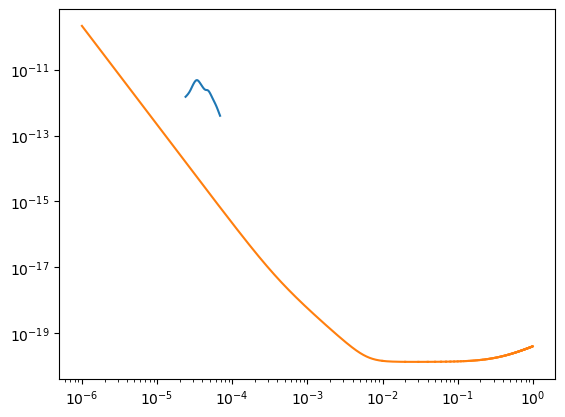

11.7273479937173
17602.9400393672 17579.32369907001 37250.42136141027 56900.94230615221
0.2222222222222222


In [9]:
Mtot = 1e8*3
M_s = Mtot*TSUN
M_ratio = 2
R_shift = 1
para = [Mtot,M_ratio,R_shift]
para_dw = [0,0,0,0]
para_dtau = [0,0,0,0]
fi = fin(Mtot,2)
fe = fout(Mtot,2)
freqen = np.arange(1e-6,1,1e-6)
freq_rd = np.arange(fi,fe,1e-6)
#np.abs(sf(freq_rd))
sig_test = sf(freq_rd,para,para_dw,para_dtau)
plt.plot(freq_rd,np.abs(sig_test))

plt.plot(freqen,np.sqrt(PowerSpectralDensity(freqen)))
plt.xscale('log')
plt.yscale('log')
#plt.xlim(4*1e-4,3*1e-3)
plt.show()
print(np.sqrt(inner_prod(sig_test,sig_test,PowerSpectralDensity(freq_rd),1e-6)))
eta = M_ratio/(1+M_ratio)**2   #eta为对称质量比
j = eta*(2*np.sqrt(3)-3.5171*eta+2.5763*eta**2)
w1 = (f1[1] + f2[1]*(1-j)**f3[1])/M_s ; dw1 = 0
w2 = (f1[2] + f2[2]*(1-j)**f3[2])/M_s ; dw2 = 0
w3 = (f1[3] + f2[3]*(3-j)**f3[3])/M_s ; dw3 = 0
w4 = (f1[4] + f2[4]*(4-j)**f3[4])/M_s ; dw4 = 0
tau1 = 2*(q1[1]+q2[1]*(1-j)**q3[1])/w1 ; dtau1 = 0
tau2 = 2*(q1[2]+q2[2]*(1-j)**q3[2])/w2 ; dtau2 = 0
tau3 = 2*(q1[3]+q2[3]*(1-j)**q3[3])/w3 ; dtau3 = 0
tau4 = 2*(q1[4]+q2[4]*(1-j)**q3[4])/w4 ; dtau4 = 0
print(tau1,tau2,tau3,tau4)
print(eta)

In [10]:
###############################################################################
#这里是专门用于计算omega和tau的fisher矩阵，先计算的是最初的没有gap的fisher矩阵的结果#
###############################################################################
#def fis_w(Mtot,M_ratio,R_shift,delta_w = [0,0,0,0],delta_tau=[0,0,0,0]):
def w_fisher(Mtotw,M_ratiow,R_shiftw):

   delta_w = [0,0,0,0]
   delta_tau = [0,0,0,0]

   f_ini = fin(Mtotw,M_ratiow)
   f_end = fout(Mtotw,M_ratiow)
   freq = np.arange(f_ini,f_end,1e-5)


   para_dtau = delta_tau
   params_1_p = [Mtotw,M_ratiow,R_shiftw]
   params_1_m = [Mtotw,M_ratiow,R_shiftw]
   mode_delta = 1e-3   #懒得改了，这里所有的delta都用22表示把
   omega = delta_w[:]
   omega[0] = omega[0]+mode_delta
   delta_w22_p = omega
   omega = delta_w[:]
   omega[0] = omega[0]-mode_delta
   delta_w22_m = omega
   deriv_w22 = (sf(freq,params_1_p,delta_w22_p,para_dtau) - sf(freq,params_1_m,delta_w22_m,para_dtau))/(2* mode_delta)


   mode_delta = 1e-3   #懒得改了，这里所有的delta都用22表示把
   omega = delta_w[:]
   omega[1] = omega[1]+mode_delta
   delta_w22_p = omega
   omega = delta_w[:]
   omega[1] = omega[1]-mode_delta
   delta_w22_m = omega
   deriv_w21 = (sf(freq,params_1_p,delta_w22_p,para_dtau) - sf(freq,params_1_m,delta_w22_m,para_dtau))/(2* mode_delta)


   mode_delta = 1e-3   #懒得改了，这里所有的delta都用22表示把
   omega = delta_w[:]
   omega[2] = omega[2]+mode_delta
   delta_w22_p = omega
   omega = delta_w[:]
   omega[2] = omega[2]-mode_delta
   delta_w22_m = omega
   deriv_w33 = (sf(freq,params_1_p,delta_w22_p,para_dtau) - sf(freq,params_1_m,delta_w22_m,para_dtau))/(2* mode_delta)

   mode_delta = 1e-3   #懒得改了，这里所有的delta都用22表示把
   omega = delta_w[:]
   omega[3] = omega[3]+mode_delta
   delta_w22_p = omega
   omega = delta_w[:]
   omega[3] = omega[3]-mode_delta
   delta_w22_m = omega
   deriv_w44 = (sf(freq,params_1_p,delta_w22_p,para_dtau) - sf(freq,params_1_m,delta_w22_m,para_dtau))/(2* mode_delta)

   #这里按顺序是tau的各模式
       #22模式的w和tau:



   mode_delta = 1e-3
   tau = delta_tau[:]
   tau[0] = tau[0]+mode_delta
   delta_tau22_p = tau
   tau = delta_tau[:]
   tau[0] = tau[0]-mode_delta
   delta_tau22_m = tau
   deriv_tau22 = (sf(freq,params_1_p,para_dw,delta_tau22_p) - sf(freq,params_1_m,para_dw,delta_tau22_m))/(2* mode_delta)


   #21模式的w和tau:




   mode_delta = 1e-3
   tau = delta_tau[:]
   tau[1] = tau[1]+mode_delta
   delta_tau22_p = tau
   tau = delta_tau[:]
   tau[1] = tau[1]-mode_delta
   delta_tau22_m = tau
   deriv_tau21 = (sf(freq,params_1_p,para_dw,delta_tau22_p) - sf(freq,params_1_m,para_dw,delta_tau22_m))/(2* mode_delta)

   #33模式的w和tau:



   mode_delta = 1e-3
   tau = delta_tau[:]
   tau[2] = tau[2]+mode_delta
   delta_tau22_p = tau
   tau = delta_tau[:]
   tau[2] = tau[2]-mode_delta
   delta_tau22_m = tau
   deriv_tau33 = (sf(freq,params_1_p,para_dw,delta_tau22_p) - sf(freq,params_1_m,para_dw,delta_tau22_m))/(2* mode_delta)

   #44模式的w和tau:



   mode_delta = 1e-3
   tau = delta_tau[:]
   tau[3] = tau[3]+mode_delta
   delta_tau22_p = tau
   tau = delta_tau[:]
   tau[3] = tau[3]-mode_delta
   delta_tau22_m = tau
   deriv_tau44 = (sf(freq,params_1_p,para_dw,delta_tau22_p) - sf(freq,params_1_m,para_dw,delta_tau22_m))/(2* mode_delta)







   diff_vec = [deriv_w22,deriv_w21,deriv_w33,deriv_w44,deriv_tau22,deriv_tau21,deriv_tau33,deriv_tau44]  # Concatenate derivatives

   N_sig = 1  # Number of signals

   N_params = len(diff_vec)  # Number of parameters we care about

   K = N_sig * N_params  # Dimension of Fisher Matrix

   fish_mix = np.eye(K)
   for i in range(0,K):
      for j in range(0,K):
         fish_mix[i,j] = inner_prod(diff_vec[i],diff_vec[j],PowerSpectralDensity(freq),1e-5)  # Construct Fisher Matrix
         
         

   import mpmath as mp  # Import arbitrary precision matrix
   #mp.dps表示精确度达到的位数
   mp.dps = 4000;   
   #print(fish_mix)
   fish_mix_prec = mp.matrix(fish_mix)
   #print(fish_mix_prec)
   fish_mix_inv = fish_mix_prec**-1
   #print(fish_mix_inv)

   #将这三行向量合成为一个矩阵
   Cov_Matrix = np.eye(K)
   for i in range(0,K):
      for j in range(0,K):
         Cov_Matrix[i,j] = float(fish_mix_inv[i,j])
   print(Cov_Matrix)
   print('Delta logMchirp optimal:',np.sqrt(np.diag(Cov_Matrix))[0])
   print('Delta eta optimal:',np.sqrt(np.diag(Cov_Matrix))[1])
   print('Delta beta optimal:',np.sqrt(np.diag(Cov_Matrix))[2])
   print('Delta beta optimal:',np.sqrt(np.diag(Cov_Matrix))[3])
   return np.sqrt(np.diag(Cov_Matrix))[0],np.sqrt(np.diag(Cov_Matrix))[1],np.sqrt(np.diag(Cov_Matrix))[2],np.sqrt(np.diag(Cov_Matrix))[3],\
   np.sqrt(np.diag(Cov_Matrix))[4],np.sqrt(np.diag(Cov_Matrix))[5],np.sqrt(np.diag(Cov_Matrix))[6],np.sqrt(np.diag(Cov_Matrix))[7]



In [11]:
#这里是只有quasi normal mode的计算模块
rd_M = np.logspace(5,7,30)
error_w1_n = []
error_w2_n = []
error_w3_n = []
error_w4_n = []

error_t1_n = []
error_t2_n = []
error_t3_n = []
error_t4_n = []
for nn in range(len(rd_M)):
    result = w_fisher(rd_M[nn],2,1)
    error_w1_n.append(result[0])
    error_w2_n.append(result[1])
    error_w3_n.append(result[2])
    error_w4_n.append(result[3])
    error_t1_n.append(result[4])
    error_t2_n.append(result[5])
    error_t3_n.append(result[6])
    error_t4_n.append(result[7])


error_w1 = np.array(error_w1_n)
error_w2 = np.array(error_w2_n)
error_w3 = np.array(error_w3_n)
error_w4 = np.array(error_w4_n)
error_t1 = np.array(error_t1_n)
error_t2 = np.array(error_t2_n)
error_t3 = np.array(error_t3_n)
error_t4 = np.array(error_t4_n)


[[ 4.08565549e-03 -1.71393339e-02  3.26693117e-04 -2.06378940e-03
   4.17258126e-03  1.23176036e-01  1.91661711e-04 -1.28534070e-02]
 [-1.71393339e-02  3.52515838e-01 -2.31835913e-03  8.92143970e-04
  -1.90821538e-01  3.71767943e-01 -3.85535008e-02  3.88444525e-01]
 [ 3.26693117e-04 -2.31835913e-03  1.46858007e-04 -5.66923064e-04
   5.71200177e-04  1.70488218e-02  1.66875996e-04 -1.10538467e-02]
 [-2.06378940e-03  8.92143970e-04 -5.66923064e-04  2.16552051e-02
   2.20963494e-03 -1.51256595e-01  6.94854430e-03  2.35683799e-02]
 [ 4.17258126e-03 -1.90821538e-01  5.71200177e-04  2.20963494e-03
   1.61084670e-01 -6.04143490e-01  1.97664904e-02 -1.79169416e-01]
 [ 1.23176036e-01  3.71767943e-01  1.70488218e-02 -1.51256595e-01
  -6.04143490e-01  9.65146937e+00 -1.22864253e-01  2.24668779e-01]
 [ 1.91661711e-04 -3.85535008e-02  1.66875996e-04  6.94854430e-03
   1.97664904e-02 -1.22864253e-01  1.28115411e-02 -6.93585172e-02]
 [-1.28534070e-02  3.88444525e-01 -1.10538467e-02  2.35683799e-02
  -

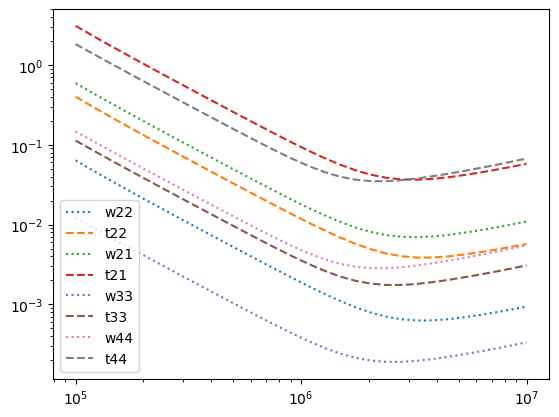

In [12]:
#画图，error随质量的变化
#plt.plot(rd_M,error_m,label= 'logM')
#plt.plot(rd_M,error_q,label = 'q')
#plt.plot(rd_M,error_r,label = 'red-shift')
plt.plot(rd_M,error_w1,label = 'w22',linestyle=':')
plt.plot(rd_M,error_t1,label = 't22',linestyle='--')
plt.plot(rd_M,error_w2,label = 'w21',linestyle=':')
plt.plot(rd_M,error_t2,label = 't21',linestyle='--')
plt.plot(rd_M,error_w3,label = 'w33',linestyle=':')
plt.plot(rd_M,error_t3,label = 't33',linestyle='--')
plt.plot(rd_M,error_w4,label = 'w44',linestyle=':')
plt.plot(rd_M,error_t4,label = 't44',linestyle='--')
plt.xscale('log')
plt.yscale('log')
plt.legend()
plt.show()

In [13]:
#6.59， 6.59，6.6，6.33,6.32,6.59,6.32
#测试了几个数值，发现ringdown信号的截止时间差不多大概就是2 pi 倍的tau44
#因此可以以此为基准去添加gap
#重新写一个gap的函数吧，之前的不好用

/home/ljq/miniconda3/envs/few_env/lib/python3.12/site-packages/matplotlib/cbook.py:1699: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/home/ljq/miniconda3/envs/few_env/lib/python3.12/site-packages/matplotlib/cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


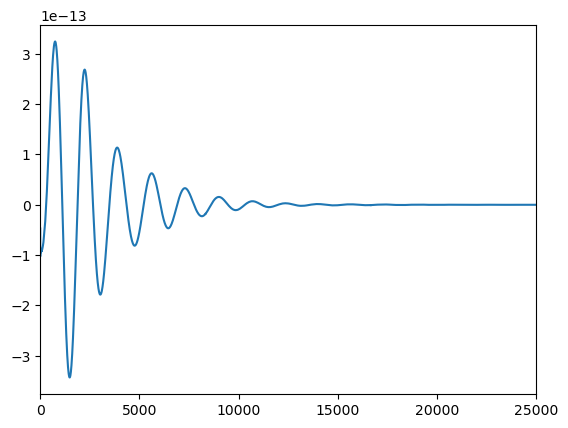

/tmp/ipykernel_12112/1839167704.py:31: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  gap_st[nn] = gap_st[nn]*0.5*(1+np.cos(pi*(nn-Ts-Tr)/Tr))
/tmp/ipykernel_12112/1839167704.py:34: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  gap_st[nn] = gap_st[nn]*0.5*(1+np.cos(pi*(nn-Te-Tr)/Tr))


586.7646679789067 585.977456635667 1241.680712047009 1896.6980768717403
完成加窗过程，窗的长度为： 1191.7305488756297
199998
199998
199998


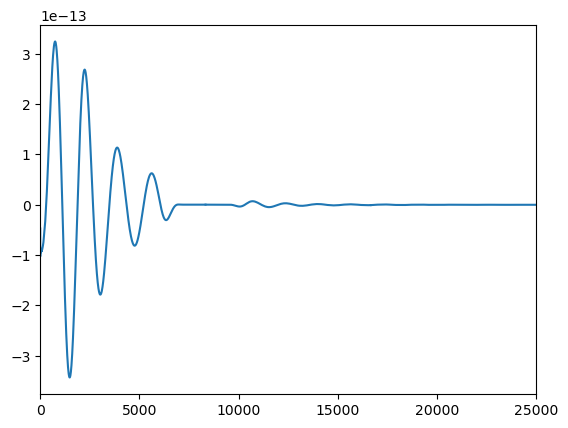

In [14]:
##########################################################################################
#这里，是加gap的函数，并且画图呈现出加了gap后对时域波源的影响，同时在此处也进行了频域到时域的变换#
##########################################################################################

#################################################
#很好，看起来加随机位置窗的工作已经很好完成了哈哈哈哈#
#################################################
#这里
#现在把内置的随机数放在外面,这样就可以提前给定gap的随机位置，然后在后面的gp_fisher函数处，再引用这个randnum
np.random.seed(123)
#randnum = 0
def win(peri,htime,Tvec):
    #注意，这里可能需要将gap的位置避免放置在ringdown信号的边缘
    #np.random.seed(1)
    #posi_gap = peri * np.random.uniform(0,1,1)
    posi_gap = peri * randnum
    #posi_gap = peri * uni_rand
    #posi_gap = 2000
    Tgap = peri/10
    Ts = posi_gap - Tgap
    Te = posi_gap + Tgap
    Tr = peri/10
    gap_st = htime[:]

    for nn in range(len(Tvec)):
        
        if nn >=Ts and nn <= Te:
            
            gap_st[nn] = 0
        elif nn <Ts and nn >= Ts-Tr:
            gap_st[nn] = gap_st[nn]*0.5*(1+np.cos(pi*(nn-Ts-Tr)/Tr))
            
        elif nn >Te and nn <= Te+Tr:
            gap_st[nn] = gap_st[nn]*0.5*(1+np.cos(pi*(nn-Te-Tr)/Tr))

    print("完成加窗过程，窗的长度为：",Tgap)
    return gap_st



randnum = np.random.uniform(0,1,1)
#randnum = .8
Mtot = 1e7
M_ratio = 2
R_shift = 1
para = [Mtot,M_ratio,R_shift]
freq_ifft = np.arange(1e-5,1,1e-5)
f_sf = sf(freq_ifft,para,para_dw,para_dtau)
st=Ga.Freq_ifft(f_sf)
plt.plot(st)
plt.xlim(0,25000)
#plt.xscale('log')
plt.show()

M_s = Mtot*TSUN
eta = M_ratio/(1+M_ratio)**2   #eta为对称质量比
j = eta*(2*np.sqrt(3)-3.5171*eta+2.5763*eta**2)
w1 = (f1[1] + f2[1]*(1-j)**f3[1])/M_s ; dw1 = 0
w2 = (f1[2] + f2[2]*(1-j)**f3[2])/M_s ; dw2 = 0
w3 = (f1[3] + f2[3]*(3-j)**f3[3])/M_s ; dw3 = 0
w4 = (f1[4] + f2[4]*(4-j)**f3[4])/M_s ; dw4 = 0
tau1 = 2*(q1[1]+q2[1]*(1-j)**q3[1])/w1 ; dtau1 = 0
tau2 = 2*(q1[2]+q2[2]*(1-j)**q3[2])/w2 ; dtau2 = 0
tau3 = 2*(q1[3]+q2[3]*(1-j)**q3[3])/w3 ; dtau3 = 0
tau4 = 2*(q1[4]+q2[4]*(1-j)**q3[4])/w4 ; dtau4 = 0
print(tau1,tau2,tau3,tau4)

period = tau4*2*pi
time = np.arange(0,len(st),1)

gaped_st = win(period,st,time)
print(len(st))
print(len(time))
print(len(gaped_st))

plt.plot(time,gaped_st)
plt.xlim(0,25000)
plt.show()

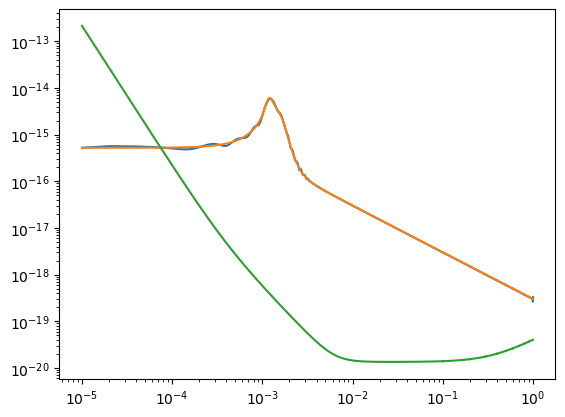

In [15]:
########################################################################################
#对于上面已经加过gap的时域信号，首先画图看看加gap之后对频域信号的影响，再取ringdown频率计算snr#
########################################################################################

sf_full = sf(freq_ifft,para,para_dw,para_dtau)
sf_gap = Ga.Time_fft(sf_full,gaped_st)
plt.plot(freq_ifft,np.abs(sf_gap))
plt.plot(freq_ifft,np.abs(sf_full))
plt.plot(freq_ifft,np.sqrt(PowerSpectralDensity(freq_ifft)))
plt.xscale('log')
plt.yscale('log')
plt.show()

[71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206]


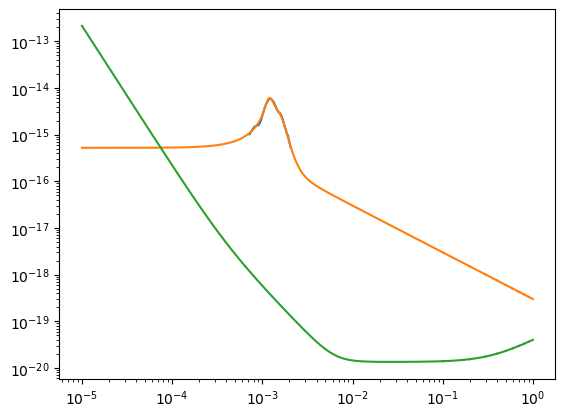

2335.55809200854
2304.0420392414326


In [16]:
fi = fin(Mtot,M_ratio)
fe = fout(Mtot,M_ratio)
n_rd = []
for nn in range(len(freq_ifft)):
    if freq_ifft[nn]>=fi :
        if freq_ifft[nn]<=fe:
            n_rd.append(nn)
print(n_rd)
n_s = n_rd[0]
n_e = n_rd[-1]
freq_rd_gap = freq_ifft[n_s:n_e]
sf_rd_gap = sf_gap[n_s:n_e]
sf_rd_full = sf_full[n_s:n_e]

plt.plot(freq_rd_gap,np.abs(sf_rd_gap))
plt.plot(freq_ifft,np.abs(sf_full))
plt.plot(freq_ifft,np.sqrt(PowerSpectralDensity(freq_ifft)))
plt.xscale('log')
plt.yscale('log')
plt.show()
print(np.sqrt(inner_prod(sf_rd_gap,sf_rd_gap,PowerSpectralDensity(freq_rd_gap),1e-4)))
print(np.sqrt(inner_prod(sf_rd_full,sf_rd_full,PowerSpectralDensity(freq_rd_gap),1e-4)))

In [17]:
#so far，加随机窗的过程已经ok了，下一步进行gap后的频谱计算fisher矩阵，
# 再之后，就利用天文学模型，看几年的任务时间中，平均对参数估计的影响
# 最后也许考虑贝叶斯，能不考虑最好hh




In [18]:
#现在结合前面，直接得到加了随机位置gap的频域信号
#这里的频率，要给全频域的频率，return 的为仅ringdown阶段的频谱
def get_gap_sf(gp_freq,params,para_dw=[0,0,0,0],para_dtau=[0,0,0,0]):
    nogap_sf = sf(gp_freq,params,para_dw,para_dtau)
    gp_st=Ga.Freq_ifft(nogap_sf)
    #gp = get_gap
    gp_M0 = params[0]
    gp_M = gp_M0*TSUN
    gp_Mratio = params[1]
    gp_eta = gp_Mratio/(1+gp_Mratio)**2

    gp_j = gp_eta*(2*np.sqrt(3)-3.5171*gp_eta+2.5763*gp_eta**2)

    gp_w4 = (f1[4] + f2[4]*(4-gp_j)**f3[4])/gp_M 
    gp_tau4 = 2*(q1[4]+q2[4]*(1-gp_j)**q3[4])/gp_w4 
    
    gp_period = gp_tau4*2*pi
    gp_time = np.arange(0,len(st),1)

    gp_gaped_st = win(gp_period,gp_st,gp_time)

    gp_sf_full = sf(gp_freq,para,para_dw,para_dtau)
    gp_sf_gap = Ga.Time_fft(gp_sf_full,gp_gaped_st)
    
    gp_fi = fin(gp_M0,gp_Mratio)
    gp_fe = fout(gp_M0,gp_Mratio)
    gp_n_rd = []
    for nn in range(len(gp_freq)):
        if gp_freq[nn]>=gp_fi :
            if gp_freq[nn]<=gp_fe:
                gp_n_rd.append(nn)
    print(gp_n_rd)
    gp_ns = gp_n_rd[0]
    gp_ne = gp_n_rd[-1]
    gp_freq_rd_gap = gp_freq[gp_ns:gp_ne]
    gp_sf_rd_gap = gp_sf_gap[gp_ns:gp_ne]
    gp_sf_rd_full = gp_sf_full[gp_ns:gp_ne]

    return gp_freq_rd_gap,gp_sf_rd_full,gp_sf_rd_gap
    
    

完成加窗过程，窗的长度为： 11.917305488756295
[7182, 7183, 7184, 7185, 7186, 7187, 7188, 7189, 7190, 7191, 7192, 7193, 7194, 7195, 7196, 7197, 7198, 7199, 7200, 7201, 7202, 7203, 7204, 7205, 7206, 7207, 7208, 7209, 7210, 7211, 7212, 7213, 7214, 7215, 7216, 7217, 7218, 7219, 7220, 7221, 7222, 7223, 7224, 7225, 7226, 7227, 7228, 7229, 7230, 7231, 7232, 7233, 7234, 7235, 7236, 7237, 7238, 7239, 7240, 7241, 7242, 7243, 7244, 7245, 7246, 7247, 7248, 7249, 7250, 7251, 7252, 7253, 7254, 7255, 7256, 7257, 7258, 7259, 7260, 7261, 7262, 7263, 7264, 7265, 7266, 7267, 7268, 7269, 7270, 7271, 7272, 7273, 7274, 7275, 7276, 7277, 7278, 7279, 7280, 7281, 7282, 7283, 7284, 7285, 7286, 7287, 7288, 7289, 7290, 7291, 7292, 7293, 7294, 7295, 7296, 7297, 7298, 7299, 7300, 7301, 7302, 7303, 7304, 7305, 7306, 7307, 7308, 7309, 7310, 7311, 7312, 7313, 7314, 7315, 7316, 7317, 7318, 7319, 7320, 7321, 7322, 7323, 7324, 7325, 7326, 7327, 7328, 7329, 7330, 7331, 7332, 7333, 7334, 7335, 7336, 7337, 7338, 7339, 7340, 7341, 7342, 

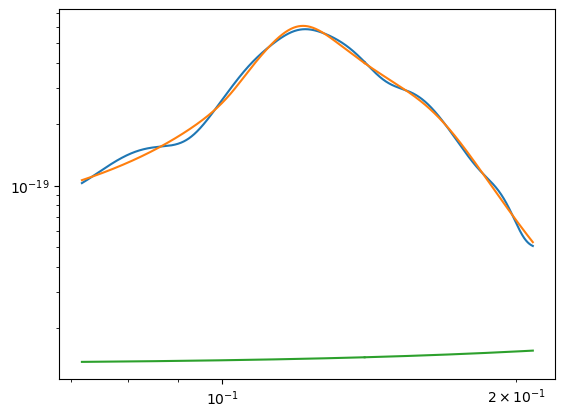

16.16327442353227
16.188031254509106


In [19]:
#这里是对get_gap_sf这个函数的测试
Mtot = 1e5
M_ratio = 2
R_shift = 1
para = [Mtot,M_ratio,R_shift]
freq_ifft = np.arange(1e-5,1,1e-5)
gapedsignal = get_gap_sf(freq_ifft,para)
gapfreq = gapedsignal[0]
sffull = gapedsignal[1]
gapsf = gapedsignal[2]

plt.plot(gapfreq,np.abs(gapsf))
plt.plot(gapfreq,np.abs(sffull))
plt.plot(gapfreq,np.sqrt(PowerSpectralDensity(gapfreq)))
plt.xscale('log')
plt.yscale('log')
plt.show()
print(np.sqrt(inner_prod(gapsf,gapsf,PowerSpectralDensity(gapfreq),1e-5)))
print(np.sqrt(inner_prod(sffull,sffull,PowerSpectralDensity(gapfreq),1e-5)))


In [20]:
#OK了兄弟们，此处对加了gap后波源的的参数估计进行计算


#注意！这里有一个问题，就是我加的是随机的gap，因此，fisher矩阵前后两个get_gap_sf是不一样的gap，
# 这个情况会使得斜率变大，从而delta变小，需要修改，但是事已至此，先写作业吧
def gpw_fisher(Mtotw,M_ratiow,R_shiftw):
   
   np.random.seed(123)
   randnum = np.random.uniform(0,1,1)
   delta_w = [0,0,0,0]
   delta_tau = [0,0,0,0]

   f_ini = fin(Mtotw,M_ratiow)
   f_end = fout(Mtotw,M_ratiow)
   freq = np.arange(1e-5,1,1e-5)
   freq_rd = np.arange(f_ini,f_end,1e-5)

   para_dtau = delta_tau
   params_1_p = [Mtotw,M_ratiow,R_shiftw]
   params_1_m = [Mtotw,M_ratiow,R_shiftw]
   mode_delta = 1e-3   #懒得改了，这里所有的delta都用22表示把
   omega = delta_w[:]
   omega[0] = omega[0]+mode_delta
   delta_w22_p = omega
   omega = delta_w[:]
   omega[0] = omega[0]-mode_delta
   delta_w22_m = omega
   deriv_w22 = (np.array(get_gap_sf(freq,params_1_p,delta_w22_p,para_dtau)[2]) - np.array(get_gap_sf(freq,params_1_m,delta_w22_m,para_dtau)[2]))/(2* mode_delta)


   mode_delta = 1e-3   #懒得改了，这里所有的delta都用22表示把
   omega = delta_w[:]
   omega[1] = omega[1]+mode_delta
   delta_w22_p = omega
   omega = delta_w[:]
   omega[1] = omega[1]-mode_delta
   delta_w22_m = omega
   deriv_w21 = (np.array(get_gap_sf(freq,params_1_p,delta_w22_p,para_dtau)[2]) - np.array(get_gap_sf(freq,params_1_m,delta_w22_m,para_dtau)[2]))/(2* mode_delta)


   mode_delta = 1e-3   #懒得改了，这里所有的delta都用22表示把
   omega = delta_w[:]
   omega[2] = omega[2]+mode_delta
   delta_w22_p = omega
   omega = delta_w[:]
   omega[2] = omega[2]-mode_delta
   delta_w22_m = omega
   deriv_w33 = (np.array(get_gap_sf(freq,params_1_p,delta_w22_p,para_dtau)[2]) - np.array(get_gap_sf(freq,params_1_m,delta_w22_m,para_dtau)[2]))/(2* mode_delta)

   mode_delta = 1e-3   #懒得改了，这里所有的delta都用22表示把
   omega = delta_w[:]
   omega[3] = omega[3]+mode_delta
   delta_w22_p = omega
   omega = delta_w[:]
   omega[3] = omega[3]-mode_delta
   delta_w22_m = omega
   deriv_w44 = (np.array(get_gap_sf(freq,params_1_p,delta_w22_p,para_dtau)[2]) - np.array(get_gap_sf(freq,params_1_m,delta_w22_m,para_dtau)[2]))/(2* mode_delta)

   #这里按顺序是tau的各模式
       #22模式的w和tau:



   mode_delta = 1e-3
   tau = delta_tau[:]
   tau[0] = tau[0]+mode_delta
   delta_tau22_p = tau
   tau = delta_tau[:]
   tau[0] = tau[0]-mode_delta
   delta_tau22_m = tau
   deriv_tau22 = (np.array(get_gap_sf(freq,params_1_p,para_dw,delta_tau22_p)[2]) - np.array(get_gap_sf(freq,params_1_m,para_dw,delta_tau22_m)[2]))/(2* mode_delta)


   #21模式的w和tau:




   mode_delta = 1e-3
   tau = delta_tau[:]
   tau[1] = tau[1]+mode_delta
   delta_tau22_p = tau
   tau = delta_tau[:]
   tau[1] = tau[1]-mode_delta
   delta_tau22_m = tau
   deriv_tau21 = (np.array(get_gap_sf(freq,params_1_p,para_dw,delta_tau22_p)[2]) - np.array(get_gap_sf(freq,params_1_m,para_dw,delta_tau22_m)[2]))/(2* mode_delta)

   #33模式的w和tau:



   mode_delta = 1e-3
   tau = delta_tau[:]
   tau[2] = tau[2]+mode_delta
   delta_tau22_p = tau
   tau = delta_tau[:]
   tau[2] = tau[2]-mode_delta
   delta_tau22_m = tau
   deriv_tau33 = (np.array(get_gap_sf(freq,params_1_p,para_dw,delta_tau22_p)[2]) - np.array(get_gap_sf(freq,params_1_m,para_dw,delta_tau22_m)[2]))/(2* mode_delta)

   #44模式的w和tau:



   mode_delta = 1e-3
   tau = delta_tau[:]
   tau[3] = tau[3]+mode_delta
   delta_tau22_p = tau
   tau = delta_tau[:]
   tau[3] = tau[3]-mode_delta
   delta_tau22_m = tau
   deriv_tau44 = (np.array(get_gap_sf(freq,params_1_p,para_dw,delta_tau22_p)[2]) - np.array(get_gap_sf(freq,params_1_m,para_dw,delta_tau22_m)[2]))/(2* mode_delta)



   freq_rd = np.array(get_gap_sf(freq,params_1_p,para_dw,delta_tau22_p)[0])



   diff_vec = [deriv_w22,deriv_w21,deriv_w33,deriv_w44,deriv_tau22,deriv_tau21,deriv_tau33,deriv_tau44]  # Concatenate derivatives

   N_sig = 1  # Number of signals

   N_params = len(diff_vec)  # Number of parameters we care about

   K = N_sig * N_params  # Dimension of Fisher Matrix

   fish_mix = np.eye(K)
   for i in range(0,K):
      for j in range(0,K):
         fish_mix[i,j] = inner_prod(diff_vec[i],diff_vec[j],PowerSpectralDensity(freq_rd),1e-5)  # Construct Fisher Matrix
         
         

   import mpmath as mp  # Import arbitrary precision matrix
   #mp.dps表示精确度达到的位数
   mp.dps = 4000;   
   #print(fish_mix)
   fish_mix_prec = mp.matrix(fish_mix)
   #print(fish_mix_prec)
   fish_mix_inv = fish_mix_prec**-1
   #print(fish_mix_inv)

   #将这三行向量合成为一个矩阵
   Cov_Matrix = np.eye(K)
   for i in range(0,K):
      for j in range(0,K):
         Cov_Matrix[i,j] = float(fish_mix_inv[i,j])
   print(Cov_Matrix)
   print('Delta logMchirp optimal:',np.sqrt(np.diag(Cov_Matrix))[0])
   print('Delta eta optimal:',np.sqrt(np.diag(Cov_Matrix))[1])
   print('Delta beta optimal:',np.sqrt(np.diag(Cov_Matrix))[2])
   print('Delta beta optimal:',np.sqrt(np.diag(Cov_Matrix))[3])
   return np.sqrt(np.diag(Cov_Matrix))[0],np.sqrt(np.diag(Cov_Matrix))[1],np.sqrt(np.diag(Cov_Matrix))[2],np.sqrt(np.diag(Cov_Matrix))[3],\
   np.sqrt(np.diag(Cov_Matrix))[4],np.sqrt(np.diag(Cov_Matrix))[5],np.sqrt(np.diag(Cov_Matrix))[6],np.sqrt(np.diag(Cov_Matrix))[7]

In [21]:
1/0

ZeroDivisionError: division by zero

In [ ]:
#这里是只有quasi normal mode的计算模块
rd_M = np.logspace(5,7,5)
error_w1_gp = []
error_w2_gp = []
error_w3_gp = []
error_w4_gp = []

error_t1_gp = []
error_t2_gp = []
error_t3_gp = []
error_t4_gp = []
for nn in range(len(rd_M)):
    result = gpw_fisher(rd_M[nn],2,1)
    error_w1_gp.append(result[0])
    error_w2_gp.append(result[1])
    error_w3_gp.append(result[2])
    error_w4_gp.append(result[3])
    error_t1_gp.append(result[4])
    error_t2_gp.append(result[5])
    error_t3_gp.append(result[6])
    error_t4_gp.append(result[7])


error_w1_gp = np.array(error_w1_gp)
error_w2_gp = np.array(error_w2_gp)
error_w3_gp = np.array(error_w3_gp)
error_w4_gp = np.array(error_w4_gp)
error_t1_gp = np.array(error_t1_gp)
error_t2_gp = np.array(error_t2_gp)
error_t3_gp = np.array(error_t3_gp)
error_t4_gp = np.array(error_t4_gp)

完成加窗过程，窗的长度为： 11.917305488756295
[7182, 7183, 7184, 7185, 7186, 7187, 7188, 7189, 7190, 7191, 7192, 7193, 7194, 7195, 7196, 7197, 7198, 7199, 7200, 7201, 7202, 7203, 7204, 7205, 7206, 7207, 7208, 7209, 7210, 7211, 7212, 7213, 7214, 7215, 7216, 7217, 7218, 7219, 7220, 7221, 7222, 7223, 7224, 7225, 7226, 7227, 7228, 7229, 7230, 7231, 7232, 7233, 7234, 7235, 7236, 7237, 7238, 7239, 7240, 7241, 7242, 7243, 7244, 7245, 7246, 7247, 7248, 7249, 7250, 7251, 7252, 7253, 7254, 7255, 7256, 7257, 7258, 7259, 7260, 7261, 7262, 7263, 7264, 7265, 7266, 7267, 7268, 7269, 7270, 7271, 7272, 7273, 7274, 7275, 7276, 7277, 7278, 7279, 7280, 7281, 7282, 7283, 7284, 7285, 7286, 7287, 7288, 7289, 7290, 7291, 7292, 7293, 7294, 7295, 7296, 7297, 7298, 7299, 7300, 7301, 7302, 7303, 7304, 7305, 7306, 7307, 7308, 7309, 7310, 7311, 7312, 7313, 7314, 7315, 7316, 7317, 7318, 7319, 7320, 7321, 7322, 7323, 7324, 7325, 7326, 7327, 7328, 7329, 7330, 7331, 7332, 7333, 7334, 7335, 7336, 7337, 7338, 7339, 7340, 7341, 7342, 

KeyboardInterrupt: 

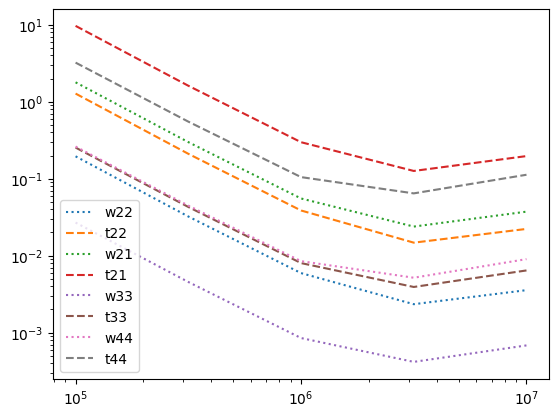

In [ ]:
#画图，error随质量的变化
#plt.plot(rd_M,error_m,label= 'logM')
#plt.plot(rd_M,error_q,label = 'q')
#plt.plot(rd_M,error_r,label = 'red-shift')
plt.plot(rd_M,error_w1_gp,label = 'w22',linestyle=':')
plt.plot(rd_M,error_t1_gp,label = 't22',linestyle='--')
plt.plot(rd_M,error_w2_gp,label = 'w21',linestyle=':')
plt.plot(rd_M,error_t2_gp,label = 't21',linestyle='--')
plt.plot(rd_M,error_w3_gp,label = 'w33',linestyle=':')
plt.plot(rd_M,error_t3_gp,label = 't33',linestyle='--')
plt.plot(rd_M,error_w4_gp,label = 'w44',linestyle=':')
plt.plot(rd_M,error_t4_gp,label = 't44',linestyle='--')
plt.xscale('log')
plt.yscale('log')
plt.legend()
plt.show()

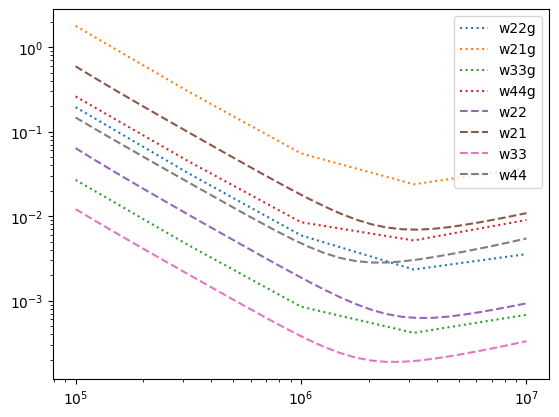

In [ ]:
rd_Mg = np.logspace(5,7,5)
rd_M = np.logspace(5,7,30)
plt.plot(rd_Mg,error_w1_gp,label = 'w22g',linestyle=':')
#plt.plot(rd_M,error_t1_gp,label = 't22',linestyle='--')
plt.plot(rd_Mg,error_w2_gp,label = 'w21g',linestyle=':')
#.plot(rd_M,error_t2_gp,label = 't21',linestyle='--')
plt.plot(rd_Mg,error_w3_gp,label = 'w33g',linestyle=':')
#plt.plot(rd_M,error_t3_gp,label = 't33',linestyle='--')
plt.plot(rd_Mg,error_w4_gp,label = 'w44g',linestyle=':')
#plt.plot(rd_M,error_t4_gp,label = 't44',linestyle='--')
plt.plot(rd_M,error_w1,label = 'w22',linestyle='--')
#plt.plot(rd_M,error_t1,label = 't22',linestyle='--')
plt.plot(rd_M,error_w2,label = 'w21',linestyle='--')
#plt.plot(rd_M,error_t2,label = 't21',linestyle='--')
plt.plot(rd_M,error_w3,label = 'w33',linestyle='--')
#plt.plot(rd_M,error_t3,label = 't33',linestyle='--')
plt.plot(rd_M,error_w4,label = 'w44',linestyle='--')
#plt.plot(rd_M,error_t4,label = 't44',linestyle='--')
plt.xscale('log')
plt.yscale('log')
plt.legend()
plt.show()


#关于这个图的呈现，有两种可考虑的方案：
#方案一：直接计算随机的gap位置导致的平均偏差，但这样方程耗时
#方案二：分别将gap位置出现在ringdown开始时间的某几个位置，作为示意。比方说，位于rd刚开始时，进行25%，进行50%，进行75%，这样计算起来就比较快了。

In [ ]:
#现在开始，是差不多可以开始计算天文学模型的偏差，但在此之前，先再看一下rd检验广义相对论的公式
#问题：怎么体现不同任务时间的差别，假如我是利用全频段积分计算的，那我怎么知道我积分到哪个频率，对应的是多久的时间？

In [ ]:
#因为最终需要落实到天文学模型，因此这里用天文学catalog算一个关于snr的小提琴图
#这里开始导出一些博源的数据
import pandas as pd

# 指定文件路径



data = pd.read_fwf('Klein16_Q3delays.txt', header=None)
# 将 DataFrame 保存为 .txt 文件，使用制表符作为分隔符




# 查看 DataFrame 的前几行
print(data)

            0             1             2       3       4         5   \
0      5.14120  2.941100e+03  1.251600e+03  0.9980  0.3041  0.166150   
1      1.30420  5.216500e+05  2.354600e+05  0.3028  0.6928  0.093150   
2      0.84722  1.710300e+05  3.495100e+04  0.7298  0.8416  0.102440   
3      0.42522  3.099700e+05  2.655800e+05  0.9980  0.9977  0.078513   
4      1.56180  9.210800e+05  3.962500e+05  0.9978  0.9980  0.268010   
...        ...           ...           ...     ...     ...       ...   
36817  0.59970  6.177000e+08  1.510700e+08  0.4121  0.3065  0.661270   
36818  0.54640  3.553500e+09  1.478700e+09  0.7985  0.3818  0.218640   
36819  0.33192  2.596900e+09  9.138600e+08  0.2866  0.5163  0.789100   
36820  0.30599  4.753500e+09  1.973400e+09  0.8593  0.4325  0.837960   
36821  0.23658  6.091200e+08  2.750400e+07  0.1766  0.3206  1.135900   

             6         7        8        9   ...        13            14  \
0      0.071761  0.165200  1.36740  0.94362  ...    38.496 

In [ ]:
q3_mass = []
N = np.arange(0,36821,1)
for nn in range(36821):
    
    MM = data.iloc[nn,1]+data.iloc[nn,2]
    
    q3_mass.append(MM)
q3_mass = np.array(q3_mass)
print(q3_mass)
q3_z = []
for nn in range(36821):
    
    red = data.iloc[nn,0]
    
    q3_z.append(red)
q3_z = np.array(q3_z)
print(q3_z)
q3_ratio = []
for nn in range(36821):
    r_m1 = data.iloc[nn,1]
    r_m2 = data.iloc[nn,2]
    midratio = r_m1/r_m2
    q3_ratio.append(midratio)
q3_ratio = np.array(q3_ratio)
print(q3_ratio)
        


[4.19270e+03 7.57110e+05 2.05981e+05 ... 5.03220e+09 3.51076e+09
 6.72690e+09]
[5.1412  1.3042  0.84722 ... 0.5464  0.33192 0.30599]
[2.34987216 2.21545061 4.89342222 ... 2.40312437 2.84168253 2.40878687]


In [ ]:
#这里是专门计算snr分部小提琴图的
def get_snr(params,para_dw=[0,0,0,0],para_dtau=[0,0,0,0]):
    
    Mass = params[0]
    Mass_ratio = params[1]
    if Mass < 1e5:
        return 1.0
    if Mass > 3*1e8:
        return 1.0
    fi = fin(Mass,Mass_ratio)
    fe = fout(Mass,Mass_ratio)
    deltaf = 1e-5
    freq_getsnr = np.arange(fi,fe,deltaf)
    nogap_sf = sf(freq_getsnr,params,para_dw,para_dtau)
    snr = np.sqrt(inner_prod(nogap_sf,nogap_sf,PowerSpectralDensity(freq_getsnr),deltaf))
    return snr


In [ ]:
#现在计算一下加了gap的catolog的snr
def get_gpsnr(gp_freq,params,para_dw=[0,0,0,0],para_dtau=[0,0,0,0]):

    
    nogap_sf = sf(gp_freq,params,para_dw,para_dtau)
    gp_st=Ga.Freq_ifft(nogap_sf)
    #gp = get_gap
    gp_M0 = params[0]
    if gp_M0 <1e5:
        return 1.0
    if gp_M0>3*1e8:
        return 1.0
    gp_M = gp_M0*TSUN
    gp_Mratio = params[1]
    gp_eta = gp_Mratio/(1+gp_Mratio)**2

    gp_j = gp_eta*(2*np.sqrt(3)-3.5171*gp_eta+2.5763*gp_eta**2)

    gp_w4 = (f1[4] + f2[4]*(4-gp_j)**f3[4])/gp_M 
    gp_tau4 = 2*(q1[4]+q2[4]*(1-gp_j)**q3[4])/gp_w4 
    
    gp_period = gp_tau4*2*pi
    gp_time = np.arange(0,len(st),1)

    gp_gaped_st = win(gp_period,gp_st,gp_time)

    gp_sf_full = sf(gp_freq,para,para_dw,para_dtau)
    gp_sf_gap = Ga.Time_fft(gp_sf_full,gp_gaped_st)
    
    gp_fi = fin(gp_M0,gp_Mratio)
    gp_fe = fout(gp_M0,gp_Mratio)
    gp_n_rd = []
    for nn in range(len(gp_freq)):
        if gp_freq[nn]>=gp_fi :
            if gp_freq[nn]<=gp_fe:
                gp_n_rd.append(nn)
    print(gp_n_rd)
    gp_ns = gp_n_rd[0]
    gp_ne = gp_n_rd[-1]
    gp_freq_rd_gap = gp_freq[gp_ns:gp_ne]
    gp_sf_rd_gap = gp_sf_gap[gp_ns:gp_ne]
    gp_sf_rd_full = gp_sf_full[gp_ns:gp_ne]
    deltaf = gp_freq[1]-gp_freq[0]
    snr = np.sqrt(inner_prod(gp_sf_rd_gap,gp_sf_rd_gap,PowerSpectralDensity(gp_freq_rd_gap),deltaf))
#    return gp_freq_rd_gap,gp_sf_rd_full,gp_sf_rd_gap
#这里就只return 一个snr把
    return snr

In [ ]:
violin = []
#para_q3 = [q3_mass,q3_ratio,q3_z]
for nn in range(100):
    para_vio = [q3_mass[nn],q3_ratio[nn],q3_z[nn]]
    snr_vio = get_snr(para_vio)
    violin.append(snr_vio)
violin = np.array(violin)


In [ ]:
array = violin  # 例子数组
 
np.savetxt('q3_snr_1000.txt', array, fmt='%f')  # 将数组保存为txt文件，使用%d格式化整数
violin = np.log10(violin)

c:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


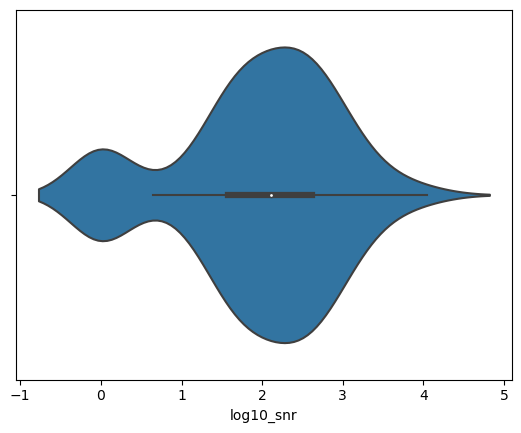

In [ ]:
import seaborn as sns
sns.violinplot(violin)
plt.xlabel('log10_snr')
plt.show()

In [ ]:
gp_violin = []
gpv_freq = np.arange(1e-5,1,1e-5)
#para_q3 = [q3_mass,q3_ratio,q3_z]
for nn in range(100):
    para_vio = [q3_mass[nn],q3_ratio[nn],q3_z[nn]]
    snr_vio = get_gpsnr(gpv_freq,para_vio)
    gp_violin.append(snr_vio)
gp_violin = np.array(gp_violin)

完成加窗过程，窗的长度为： 89.24258881248355
[942, 943, 944, 945, 946, 947, 948, 949, 950, 951, 952, 953, 954, 955, 956, 957, 958, 959, 960, 961, 962, 963, 964, 965, 966, 967, 968, 969, 970, 971, 972, 973, 974, 975, 976, 977, 978, 979, 980, 981, 982, 983, 984, 985, 986, 987, 988, 989, 990, 991, 992, 993, 994, 995, 996, 997, 998, 999, 1000, 1001, 1002, 1003, 1004, 1005, 1006, 1007, 1008, 1009, 1010, 1011, 1012, 1013, 1014, 1015, 1016, 1017, 1018, 1019, 1020, 1021, 1022, 1023, 1024, 1025, 1026, 1027, 1028, 1029, 1030, 1031, 1032, 1033, 1034, 1035, 1036, 1037, 1038, 1039, 1040, 1041, 1042, 1043, 1044, 1045, 1046, 1047, 1048, 1049, 1050, 1051, 1052, 1053, 1054, 1055, 1056, 1057, 1058, 1059, 1060, 1061, 1062, 1063, 1064, 1065, 1066, 1067, 1068, 1069, 1070, 1071, 1072, 1073, 1074, 1075, 1076, 1077, 1078, 1079, 1080, 1081, 1082, 1083, 1084, 1085, 1086, 1087, 1088, 1089, 1090, 1091, 1092, 1093, 1094, 1095, 1096, 1097, 1098, 1099, 1100, 1101, 1102, 1103, 1104, 1105, 1106, 1107, 1108, 1109, 1110, 1111, 1112,

c:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


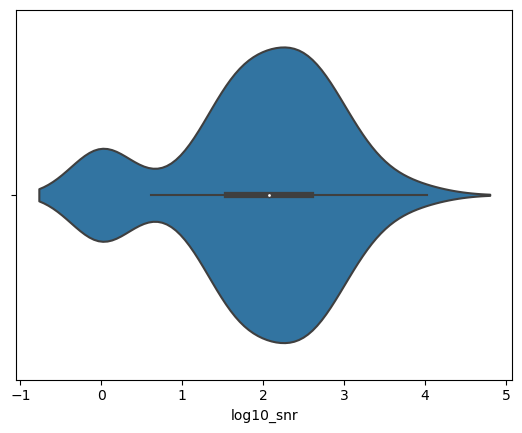

In [ ]:
#array = gpviolin  # 例子数组
 
#np.savetxt('q3_snr_1000.txt', array, fmt='%f')  # 将数组保存为txt文件，使用%d格式化整数
gpviolin = np.log10(gp_violin)
import seaborn as sns
sns.violinplot(gpviolin)
plt.xlabel('log10_snr')
plt.show()

[[ 3.12424373e-03 -1.14894356e-02  2.91689689e-03  7.49290260e-02]
 [-1.14894356e-02  1.90136400e-01 -1.14253870e-01  2.10285445e-01]
 [ 2.91689689e-03 -1.14253870e-01  1.20244613e-01 -4.18860108e-01]
 [ 7.49290260e-02  2.10285445e-01 -4.18860108e-01  5.44397466e+00]]
Delta logMchirp optimal: 0.05589493476599757
Delta eta optimal: 0.4360463282444549
Delta beta optimal: 0.3467630509288896
Delta beta optimal: 2.3332326635624243
[[ 6.70801941e-05 -2.46713567e-04  6.24303207e-05  1.60001606e-03]
 [-2.46713567e-04  4.06491190e-03 -2.44063931e-03  4.50608333e-03]
 [ 6.24303207e-05 -2.44063931e-03  2.58033561e-03 -9.00641016e-03]
 [ 1.60001606e-03  4.50608333e-03 -9.00641016e-03  1.16538004e-01]]
Delta logMchirp optimal: 0.008190249940794238
Delta eta optimal: 0.06375666158835945
Delta beta optimal: 0.0507970039760003
Delta beta optimal: 0.34137663123218986
[[ 1.35505884e-06 -5.03613311e-06  1.28119210e-06  3.29737830e-05]
 [-5.03613311e-06  8.45071108e-05 -5.03730598e-05  9.27305066e-05]
 [ 

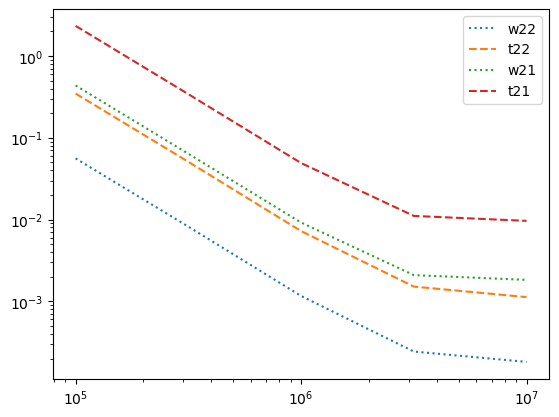

In [40]:
#现在计算联合观测
#首先增加一个LISA的灵敏度曲线，和可能还需要修改为LISA的波形
#但是经过
Mtot = 1e6
M_ratio = 2
R_shift = 1
rd_M = np.logspace(5,7,5)
error_w1_gp = []
error_w2_gp = []
error_w3_gp = []
error_w4_gp = []

error_t1_gp = []
error_t2_gp = []
error_t3_gp = []
error_t4_gp = []
for nn in range(len(rd_M)):
    #cbgp就是没有gap的联合观测
    result = cbgp_fisher(rd_M[nn],2,1)
    error_w1_gp.append(result[0])
    error_w2_gp.append(result[1])
    #error_w3_gp.append(result[2])
    #error_w4_gp.append(result[3])
    error_t1_gp.append(result[2])
    error_t2_gp.append(result[3])
    #error_t3_gp.append(result[6])
    #error_t4_gp.append(result[7])


error_w1_gp = np.array(error_w1_gp)
error_w2_gp = np.array(error_w2_gp)
error_w3_gp = np.array(error_w3_gp)
error_w4_gp = np.array(error_w4_gp)
error_t1_gp = np.array(error_t1_gp)
error_t2_gp = np.array(error_t2_gp)
error_t3_gp = np.array(error_t3_gp)
error_t4_gp = np.array(error_t4_gp)

plt.plot(rd_M,error_w1_gp,label = 'w22',linestyle=':')
plt.plot(rd_M,error_t1_gp,label = 't22',linestyle='--')
plt.plot(rd_M,error_w2_gp,label = 'w21',linestyle=':')
plt.plot(rd_M,error_t2_gp,label = 't21',linestyle='--')
#plt.plot(rd_M,error_w3_gp,label = 'w33',linestyle=':')
#plt.plot(rd_M,error_t3_gp,label = 't33',linestyle='--')
#plt.plot(rd_M,error_w4_gp,label = 'w44',linestyle=':')
#plt.plot(rd_M,error_t4_gp,label = 't44',linestyle='--')
plt.xscale('log')
plt.yscale('log')
plt.legend()
plt.show()


[[ 4.08565549e-03 -1.71393339e-02  3.26693117e-04 -2.06378940e-03
   4.17258126e-03  1.23176036e-01  1.91661711e-04 -1.28534070e-02]
 [-1.71393339e-02  3.52515838e-01 -2.31835913e-03  8.92143970e-04
  -1.90821538e-01  3.71767943e-01 -3.85535008e-02  3.88444525e-01]
 [ 3.26693117e-04 -2.31835913e-03  1.46858007e-04 -5.66923064e-04
   5.71200177e-04  1.70488218e-02  1.66875996e-04 -1.10538467e-02]
 [-2.06378940e-03  8.92143970e-04 -5.66923064e-04  2.16552051e-02
   2.20963494e-03 -1.51256595e-01  6.94854430e-03  2.35683799e-02]
 [ 4.17258126e-03 -1.90821538e-01  5.71200177e-04  2.20963494e-03
   1.61084670e-01 -6.04143490e-01  1.97664904e-02 -1.79169416e-01]
 [ 1.23176036e-01  3.71767943e-01  1.70488218e-02 -1.51256595e-01
  -6.04143490e-01  9.65146937e+00 -1.22864253e-01  2.24668779e-01]
 [ 1.91661711e-04 -3.85535008e-02  1.66875996e-04  6.94854430e-03
   1.97664904e-02 -1.22864253e-01  1.28115411e-02 -6.93585172e-02]
 [-1.28534070e-02  3.88444525e-01 -1.10538467e-02  2.35683799e-02
  -

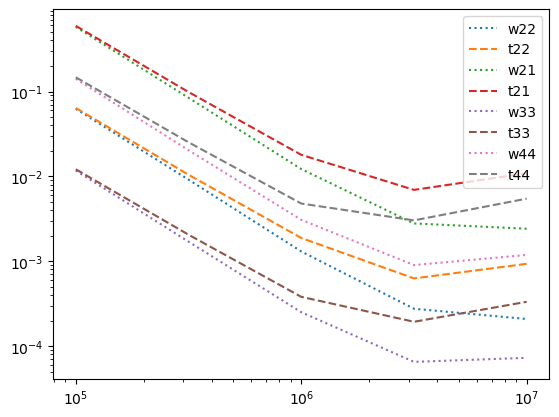

In [24]:
rd_M = np.logspace(5,7,5)
error_w1_n = []
error_w2_n = []
error_w3_n = []
error_w4_n = []

error_t1_n = []
error_t2_n = []
error_t3_n = []
error_t4_n = []
for nn in range(len(rd_M)):
    result = w_fisher(rd_M[nn],2,1)
    error_w1_n.append(result[0])
    error_w2_n.append(result[1])
    error_w3_n.append(result[2])
    error_w4_n.append(result[3])
    error_t1_n.append(result[4])
    error_t2_n.append(result[5])
    error_t3_n.append(result[6])
    error_t4_n.append(result[7])


error_w1 = np.array(error_w1_n)
error_w2 = np.array(error_w2_n)
error_w3 = np.array(error_w3_n)
error_w4 = np.array(error_w4_n)
error_t1 = np.array(error_t1_n)
error_t2 = np.array(error_t2_n)
error_t3 = np.array(error_t3_n)
error_t4 = np.array(error_t4_n)

plt.plot(rd_M,error_w1_gp,label = 'w22',linestyle=':')
plt.plot(rd_M,error_w1,label = 't22',linestyle='--')
plt.plot(rd_M,error_w2_gp,label = 'w21',linestyle=':')
plt.plot(rd_M,error_w2,label = 't21',linestyle='--')
plt.plot(rd_M,error_w3_gp,label = 'w33',linestyle=':')
plt.plot(rd_M,error_w3,label = 't33',linestyle='--')
plt.plot(rd_M,error_w4_gp,label = 'w44',linestyle=':')
plt.plot(rd_M,error_w4,label = 't44',linestyle='--')
plt.xscale('log')
plt.yscale('log')
plt.legend()
plt.show()

In [59]:
#单纯地算个随机gap对参数估计影响没意思，现在计算，一个gap出现在rd开始，一个出现在rd结束的参数估计
randnum = .5
def cbtest_fisher(Mtotw,M_ratiow,R_shiftw):
   

   randnum = 0.8
   delta_w = [0,0,0,0]
   delta_tau = [0,0,0,0]

   f_ini = fin(Mtotw,M_ratiow)
   f_end = fout(Mtotw,M_ratiow)
   freq = np.arange(1e-5,1,1e-5)
   freq_rd = np.arange(f_ini,f_end,1e-5)

   para_dtau = delta_tau
   params_1_p = [Mtotw,M_ratiow,R_shiftw]
   params_1_m = [Mtotw,M_ratiow,R_shiftw]
   mode_delta = 1e-3   #懒得改了，这里所有的delta都用22表示把
   omega = delta_w[:]
   omega[0] = omega[0]+mode_delta
   delta_w22_p = omega
   omega = delta_w[:]
   omega[0] = omega[0]-mode_delta
   delta_w22_m = omega
   deriv_w22 = (np.array(get_gap_sf(freq,params_1_p,delta_w22_p,para_dtau)[2]) - np.array(get_gap_sf(freq,params_1_m,delta_w22_m,para_dtau)[2]))/(2* mode_delta)


   mode_delta = 1e-3   #懒得改了，这里所有的delta都用22表示把
   omega = delta_w[:]
   omega[1] = omega[1]+mode_delta
   delta_w22_p = omega
   omega = delta_w[:]
   omega[1] = omega[1]-mode_delta
   delta_w22_m = omega
   deriv_w21 = (np.array(get_gap_sf(freq,params_1_p,delta_w22_p,para_dtau)[2]) - np.array(get_gap_sf(freq,params_1_m,delta_w22_m,para_dtau)[2]))/(2* mode_delta)



   #这里按顺序是tau的各模式
       #22模式的w和tau:



   mode_delta = 1e-3
   tau = delta_tau[:]
   tau[0] = tau[0]+mode_delta
   delta_tau22_p = tau
   tau = delta_tau[:]
   tau[0] = tau[0]-mode_delta
   delta_tau22_m = tau
   deriv_tau22 = (np.array(get_gap_sf(freq,params_1_p,para_dw,delta_tau22_p)[2]) - np.array(get_gap_sf(freq,params_1_m,para_dw,delta_tau22_m)[2]))/(2* mode_delta)


   #21模式的w和tau:




   mode_delta = 1e-3
   tau = delta_tau[:]
   tau[1] = tau[1]+mode_delta
   delta_tau22_p = tau
   tau = delta_tau[:]
   tau[1] = tau[1]-mode_delta
   delta_tau22_m = tau
   deriv_tau21 = (np.array(get_gap_sf(freq,params_1_p,para_dw,delta_tau22_p)[2]) - np.array(get_gap_sf(freq,params_1_m,para_dw,delta_tau22_m)[2]))/(2* mode_delta)

   #33模式的w和tau:





   freq_rd = np.array(get_gap_sf(freq,params_1_p,para_dw,delta_tau22_p)[0])



   diff_vec_tq = [deriv_w22,deriv_w21,deriv_tau22,deriv_tau21]  # Concatenate derivatives

   N_sig = 1  # Number of signals

   N_params = len(diff_vec_tq)  # Number of parameters we care about

   K = N_sig * N_params  # Dimension of Fisher Matrix

   fish_mix_tq = np.eye(K)
   for i in range(0,K):
      for j in range(0,K):
         fish_mix_tq[i,j] = inner_prod(diff_vec_tq[i],diff_vec_tq[j],PowerSpectralDensity(freq_rd),1e-5)  # Construct Fisher Matrix
         


#这里放LISA的：

   randnum = 0.15
   delta_w = [0,0,0,0]
   delta_tau = [0,0,0,0]

   f_ini = fin(Mtotw,M_ratiow)
   f_end = fout(Mtotw,M_ratiow)
   freq = np.arange(1e-5,1,1e-5)
   freq_rd = np.arange(f_ini,f_end,1e-5)

   para_dtau = delta_tau
   params_1_p = [Mtotw,M_ratiow,R_shiftw]
   params_1_m = [Mtotw,M_ratiow,R_shiftw]
   mode_delta = 1e-3   #懒得改了，这里所有的delta都用22表示把
   omega = delta_w[:]
   omega[0] = omega[0]+mode_delta
   delta_w22_p = omega
   omega = delta_w[:]
   omega[0] = omega[0]-mode_delta
   delta_w22_m = omega
   deriv_w22 = (np.array(get_gap_sf(freq,params_1_p,delta_w22_p,para_dtau)[2]) - np.array(get_gap_sf(freq,params_1_m,delta_w22_m,para_dtau)[2]))/(2* mode_delta)


   mode_delta = 1e-3   #懒得改了，这里所有的delta都用22表示把
   omega = delta_w[:]
   omega[1] = omega[1]+mode_delta
   delta_w22_p = omega
   omega = delta_w[:]
   omega[1] = omega[1]-mode_delta
   delta_w22_m = omega
   deriv_w21 = (np.array(get_gap_sf(freq,params_1_p,delta_w22_p,para_dtau)[2]) - np.array(get_gap_sf(freq,params_1_m,delta_w22_m,para_dtau)[2]))/(2* mode_delta)



   #这里按顺序是tau的各模式
       #22模式的w和tau:



   mode_delta = 1e-3
   tau = delta_tau[:]
   tau[0] = tau[0]+mode_delta
   delta_tau22_p = tau
   tau = delta_tau[:]
   tau[0] = tau[0]-mode_delta
   delta_tau22_m = tau
   deriv_tau22 = (np.array(get_gap_sf(freq,params_1_p,para_dw,delta_tau22_p)[2]) - np.array(get_gap_sf(freq,params_1_m,para_dw,delta_tau22_m)[2]))/(2* mode_delta)


   #21模式的w和tau:




   mode_delta = 1e-3
   tau = delta_tau[:]
   tau[1] = tau[1]+mode_delta
   delta_tau22_p = tau
   tau = delta_tau[:]
   tau[1] = tau[1]-mode_delta
   delta_tau22_m = tau
   deriv_tau21 = (np.array(get_gap_sf(freq,params_1_p,para_dw,delta_tau22_p)[2]) - np.array(get_gap_sf(freq,params_1_m,para_dw,delta_tau22_m)[2]))/(2* mode_delta)

   #33模式的w和tau:





   freq_rd = np.array(get_gap_sf(freq,params_1_p,para_dw,delta_tau22_p)[0])



   diff_vec_ls = [deriv_w22,deriv_w21,deriv_tau22,deriv_tau21]  # Concatenate derivatives

   N_sig = 1  # Number of signals

   N_params = len(diff_vec_ls)  # Number of parameters we care about

   K = N_sig * N_params  # Dimension of Fisher Matrix

   fish_mix_ls = np.eye(K)
   for i in range(0,K):
      for j in range(0,K):
         fish_mix_ls[i,j] = inner_prod(diff_vec_ls[i],diff_vec_ls[j],fh.psd_ls(freq_rd),1e-5)  # Construct Fisher Matrix






   import mpmath as mp  # Import arbitrary precision matrix
   #mp.dps表示精确度达到的位数
   mp.dps = 4000;   
   #print(fish_mix)
   fish_mix_prec = mp.matrix(fish_mix_tq)+mp.matrix(fish_mix_ls)
   #print(fish_mix_prec)
   fish_mix_inv = fish_mix_prec**-1
   #print(fish_mix_inv)

   #将这三行向量合成为一个矩阵
   Cov_Matrix = np.eye(K)
   for i in range(0,K):
      for j in range(0,K):
         Cov_Matrix[i,j] = float(fish_mix_inv[i,j])
   print(Cov_Matrix)
   print('Delta logMchirp optimal:',np.sqrt(np.diag(Cov_Matrix))[0])
   print('Delta eta optimal:',np.sqrt(np.diag(Cov_Matrix))[1])
   print('Delta beta optimal:',np.sqrt(np.diag(Cov_Matrix))[2])
   print('Delta beta optimal:',np.sqrt(np.diag(Cov_Matrix))[3])
   return np.sqrt(np.diag(Cov_Matrix))[0],np.sqrt(np.diag(Cov_Matrix))[1],np.sqrt(np.diag(Cov_Matrix))[2],np.sqrt(np.diag(Cov_Matrix))[3]

完成加窗过程，窗的长度为： 11.917305488756295
[7182, 7183, 7184, 7185, 7186, 7187, 7188, 7189, 7190, 7191, 7192, 7193, 7194, 7195, 7196, 7197, 7198, 7199, 7200, 7201, 7202, 7203, 7204, 7205, 7206, 7207, 7208, 7209, 7210, 7211, 7212, 7213, 7214, 7215, 7216, 7217, 7218, 7219, 7220, 7221, 7222, 7223, 7224, 7225, 7226, 7227, 7228, 7229, 7230, 7231, 7232, 7233, 7234, 7235, 7236, 7237, 7238, 7239, 7240, 7241, 7242, 7243, 7244, 7245, 7246, 7247, 7248, 7249, 7250, 7251, 7252, 7253, 7254, 7255, 7256, 7257, 7258, 7259, 7260, 7261, 7262, 7263, 7264, 7265, 7266, 7267, 7268, 7269, 7270, 7271, 7272, 7273, 7274, 7275, 7276, 7277, 7278, 7279, 7280, 7281, 7282, 7283, 7284, 7285, 7286, 7287, 7288, 7289, 7290, 7291, 7292, 7293, 7294, 7295, 7296, 7297, 7298, 7299, 7300, 7301, 7302, 7303, 7304, 7305, 7306, 7307, 7308, 7309, 7310, 7311, 7312, 7313, 7314, 7315, 7316, 7317, 7318, 7319, 7320, 7321, 7322, 7323, 7324, 7325, 7326, 7327, 7328, 7329, 7330, 7331, 7332, 7333, 7334, 7335, 7336, 7337, 7338, 7339, 7340, 7341, 7342, 

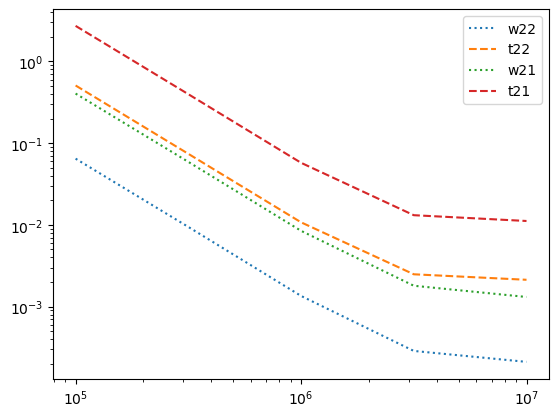

In [60]:
rd_M = np.logspace(5,7,5)
error_w1_tst = []
error_w2_tst = []
#error_w3_tst = []
#error_w4_tst = []

error_t1_tst = []
error_t2_tst = []
#error_t3_tst = []
#error_t4_tst = []
for nn in range(len(rd_M)):
    result = cbtest_fisher(rd_M[nn],2,1)
    error_w1_tst.append(result[0])
    error_w2_tst.append(result[1])
    error_t1_tst.append(result[2])
    error_t2_tst.append(result[3])
#    error_t1_tst.append(result[4])
#    error_t2_tst.append(result[5])
#    error_t3_tst.append(result[6])
#    error_t4_tst.append(result[7])


error_w1_tst = np.array(error_w1_tst)
error_w2_tst = np.array(error_w2_tst)
error_t1_tst = np.array(error_t1_tst)
error_t2_tst = np.array(error_t2_tst)
#error_t1_tst = np.array(error_t1_tst)
#error_t2_tst = np.array(error_t2_tst)
#error_t3_tst = np.array(error_t3_tst)
#error_t4_tst = np.array(error_t4_tst)

plt.plot(rd_M,error_w1_tst,label = 'w22',linestyle=':')
plt.plot(rd_M,error_w2_tst,label = 't22',linestyle='--')
plt.plot(rd_M,error_t1_tst,label = 'w21',linestyle=':')
plt.plot(rd_M,error_t2_tst,label = 't21',linestyle='--')

plt.xscale('log')
plt.yscale('log')
plt.legend()
plt.show()

In [27]:
def testtq_fisher(Mtotw,M_ratiow,R_shiftw):
   

   randnum = .15
   delta_w = [0,0,0,0]
   delta_tau = [0,0,0,0]

   f_ini = fin(Mtotw,M_ratiow)
   f_end = fout(Mtotw,M_ratiow)
   freq = np.arange(1e-5,1,1e-5)
   freq_rd = np.arange(f_ini,f_end,1e-5)

   para_dtau = delta_tau
   params_1_p = [Mtotw,M_ratiow,R_shiftw]
   params_1_m = [Mtotw,M_ratiow,R_shiftw]
   mode_delta = 1e-3   #懒得改了，这里所有的delta都用22表示把
   omega = delta_w[:]
   omega[0] = omega[0]+mode_delta
   delta_w22_p = omega
   omega = delta_w[:]
   omega[0] = omega[0]-mode_delta
   delta_w22_m = omega
   deriv_w22 = (np.array(get_gap_sf(freq,params_1_p,delta_w22_p,para_dtau)[2]) - np.array(get_gap_sf(freq,params_1_m,delta_w22_m,para_dtau)[2]))/(2* mode_delta)


   mode_delta = 1e-3   #懒得改了，这里所有的delta都用22表示把
   omega = delta_w[:]
   omega[1] = omega[1]+mode_delta
   delta_w22_p = omega
   omega = delta_w[:]
   omega[1] = omega[1]-mode_delta
   delta_w22_m = omega
   deriv_w21 = (np.array(get_gap_sf(freq,params_1_p,delta_w22_p,para_dtau)[2]) - np.array(get_gap_sf(freq,params_1_m,delta_w22_m,para_dtau)[2]))/(2* mode_delta)



   #这里按顺序是tau的各模式
       #22模式的w和tau:



   mode_delta = 1e-3
   tau = delta_tau[:]
   tau[0] = tau[0]+mode_delta
   delta_tau22_p = tau
   tau = delta_tau[:]
   tau[0] = tau[0]-mode_delta
   delta_tau22_m = tau
   deriv_tau22 = (np.array(get_gap_sf(freq,params_1_p,para_dw,delta_tau22_p)[2]) - np.array(get_gap_sf(freq,params_1_m,para_dw,delta_tau22_m)[2]))/(2* mode_delta)


   #21模式的w和tau:




   mode_delta = 1e-3
   tau = delta_tau[:]
   tau[1] = tau[1]+mode_delta
   delta_tau22_p = tau
   tau = delta_tau[:]
   tau[1] = tau[1]-mode_delta
   delta_tau22_m = tau
   deriv_tau21 = (np.array(get_gap_sf(freq,params_1_p,para_dw,delta_tau22_p)[2]) - np.array(get_gap_sf(freq,params_1_m,para_dw,delta_tau22_m)[2]))/(2* mode_delta)

   #33模式的w和tau:





   freq_rd = np.array(get_gap_sf(freq,params_1_p,para_dw,delta_tau22_p)[0])



   diff_vec = [deriv_w22,deriv_w21,deriv_tau22,deriv_tau21]  # Concatenate derivatives

   N_sig = 1  # Number of signals

   N_params = len(diff_vec)  # Number of parameters we care about

   K = N_sig * N_params  # Dimension of Fisher Matrix

   fish_mix = np.eye(K)
   for i in range(0,K):
      for j in range(0,K):
         fish_mix[i,j] = inner_prod(diff_vec[i],diff_vec[j],PowerSpectralDensity(freq_rd),1e-5)  # Construct Fisher Matrix
         
         

   import mpmath as mp  # Import arbitrary precision matrix
   #mp.dps表示精确度达到的位数
   mp.dps = 4000;   
   #print(fish_mix)
   fish_mix_prec = mp.matrix(fish_mix)
   #print(fish_mix_prec)
   fish_mix_inv = fish_mix_prec**-1
   #print(fish_mix_inv)

   #将这三行向量合成为一个矩阵
   Cov_Matrix = np.eye(K)
   for i in range(0,K):
      for j in range(0,K):
         Cov_Matrix[i,j] = float(fish_mix_inv[i,j])
   print(Cov_Matrix)
   print('Delta logMchirp optimal:',np.sqrt(np.diag(Cov_Matrix))[0])
   print('Delta eta optimal:',np.sqrt(np.diag(Cov_Matrix))[1])
   print('Delta beta optimal:',np.sqrt(np.diag(Cov_Matrix))[2])
   print('Delta beta optimal:',np.sqrt(np.diag(Cov_Matrix))[3])
   return np.sqrt(np.diag(Cov_Matrix))[0],np.sqrt(np.diag(Cov_Matrix))[1],np.sqrt(np.diag(Cov_Matrix))[2],np.sqrt(np.diag(Cov_Matrix))[3]

In [28]:
rd_M = np.logspace(5,7,5)
error_w1_tsttq = []
error_w2_tsttq = []
#error_w3_tst = []
#error_w4_tst = []

error_t1_tsttq = []
error_t2_tsttq = []
#error_t3_tst = []
#error_t4_tst = []
for nn in range(len(rd_M)):
    result = testtq_fisher(rd_M[nn],2,1)
    error_w1_tsttq.append(result[0])
    error_w2_tsttq.append(result[1])
    error_t1_tsttq.append(result[2])
    error_t2_tsttq.append(result[3])
#    error_t1_tst.append(result[4])
#    error_t2_tst.append(result[5])
#    error_t3_tst.append(result[6])
#    error_t4_tst.append(result[7])


error_w1_tsttq = np.array(error_w1_tsttq)
error_w2_tsttq = np.array(error_w2_tsttq)
error_t1_tsttq = np.array(error_t1_tsttq)
error_t2_tsttq = np.array(error_t2_tsttq)
#error_t1_tst = np.array(error_t1_tst)
#error_t2_tst = np.array(error_t2_tst)
#error_t3_tst = np.array(error_t3_tst)
#error_t4_tst = np.array(error_t4_tst)


完成加窗过程，窗的长度为： 11.917305488756295
[7182, 7183, 7184, 7185, 7186, 7187, 7188, 7189, 7190, 7191, 7192, 7193, 7194, 7195, 7196, 7197, 7198, 7199, 7200, 7201, 7202, 7203, 7204, 7205, 7206, 7207, 7208, 7209, 7210, 7211, 7212, 7213, 7214, 7215, 7216, 7217, 7218, 7219, 7220, 7221, 7222, 7223, 7224, 7225, 7226, 7227, 7228, 7229, 7230, 7231, 7232, 7233, 7234, 7235, 7236, 7237, 7238, 7239, 7240, 7241, 7242, 7243, 7244, 7245, 7246, 7247, 7248, 7249, 7250, 7251, 7252, 7253, 7254, 7255, 7256, 7257, 7258, 7259, 7260, 7261, 7262, 7263, 7264, 7265, 7266, 7267, 7268, 7269, 7270, 7271, 7272, 7273, 7274, 7275, 7276, 7277, 7278, 7279, 7280, 7281, 7282, 7283, 7284, 7285, 7286, 7287, 7288, 7289, 7290, 7291, 7292, 7293, 7294, 7295, 7296, 7297, 7298, 7299, 7300, 7301, 7302, 7303, 7304, 7305, 7306, 7307, 7308, 7309, 7310, 7311, 7312, 7313, 7314, 7315, 7316, 7317, 7318, 7319, 7320, 7321, 7322, 7323, 7324, 7325, 7326, 7327, 7328, 7329, 7330, 7331, 7332, 7333, 7334, 7335, 7336, 7337, 7338, 7339, 7340, 7341, 7342, 

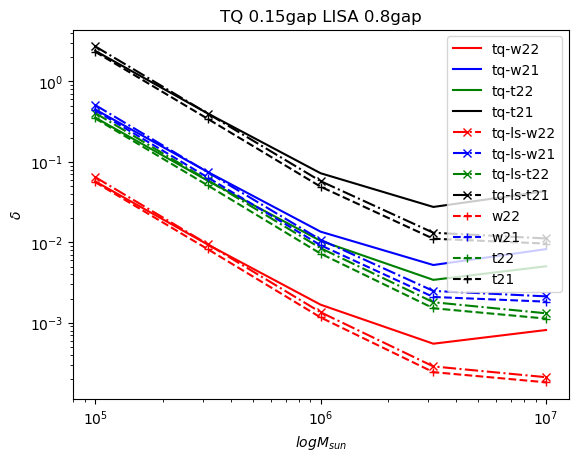

In [61]:
#这几个是天琴0.15处的gap
plt.plot(rd_M,error_w1_tsttq,label = 'tq-w22',linestyle='-',color = 'red')
plt.plot(rd_M,error_w2_tsttq,label = 'tq-w21',linestyle='-',color = 'blue')
plt.plot(rd_M,error_t1_tsttq,label = 'tq-t22',linestyle='-',color = 'green')
plt.plot(rd_M,error_t2_tsttq,label = 'tq-t21',linestyle='-',color = 'black')
#这几个是联合观测加gap的
plt.plot(rd_M,error_w1_tst,label = 'tq-ls-w22',linestyle='-.',marker = 'x',color = 'red')
plt.plot(rd_M,error_w2_tst,label = 'tq-ls-w21',linestyle='-.',marker = 'x',color = 'blue')
plt.plot(rd_M,error_t1_tst,label = 'tq-ls-t22',linestyle='-.',marker = 'x',color = 'green')
plt.plot(rd_M,error_t2_tst,label = 'tq-ls-t21',linestyle='-.',marker = 'x',color = 'black')
#纯联合观测
plt.plot(rd_M,error_w1_gp,label = 'w22',marker='+',color = 'red',linestyle='--')

plt.plot(rd_M,error_w2_gp,label = 'w21',marker='+',color = 'blue',linestyle='--')

plt.plot(rd_M,error_t1_gp,label = 't22',marker='+',color = 'green',linestyle='--')

plt.plot(rd_M,error_t2_gp,label = 't21',marker='+',color = 'black',linestyle='--')
plt.xlabel('$log M_{sun}$')
plt.ylabel('$\delta$')
plt.title('TQ 0.15gap LISA 0.8gap')
plt.xscale('log')
plt.yscale('log')
plt.legend()
plt.show()

In [37]:
def cbgp_fisher(Mtotw,M_ratiow,R_shiftw):

   delta_w = [0,0,0,0]
   delta_tau = [0,0,0,0]

   f_ini = fin(Mtotw,M_ratiow)
   f_end = fout(Mtotw,M_ratiow)
   freq = np.arange(f_ini,f_end,1e-5)

   para_dw = [0,0,0,0]
   para_dtau = [0,0,0,0]
   para_dtau = delta_tau
   params_1_p = [Mtotw,M_ratiow,R_shiftw]
   params_1_m = [Mtotw,M_ratiow,R_shiftw]
   mode_delta = 1e-3   #懒得改了，这里所有的delta都用22表示把
   omega = delta_w[:]
   omega[0] = omega[0]+mode_delta
   delta_w22_p = omega
   omega = delta_w[:]
   omega[0] = omega[0]-mode_delta
   delta_w22_m = omega
   deriv_w22 = (sf(freq,params_1_p,delta_w22_p,para_dtau) - sf(freq,params_1_m,delta_w22_m,para_dtau))/(2* mode_delta)


   mode_delta = 1e-3   #懒得改了，这里所有的delta都用22表示把
   omega = delta_w[:]
   omega[1] = omega[1]+mode_delta
   delta_w22_p = omega
   omega = delta_w[:]
   omega[1] = omega[1]-mode_delta
   delta_w22_m = omega
   deriv_w21 = (sf(freq,params_1_p,delta_w22_p,para_dtau) - sf(freq,params_1_m,delta_w22_m,para_dtau))/(2* mode_delta)




   #这里按顺序是tau的各模式
       #22模式的w和tau:



   mode_delta = 1e-3
   tau = delta_tau[:]
   tau[0] = tau[0]+mode_delta
   delta_tau22_p = tau
   tau = delta_tau[:]
   tau[0] = tau[0]-mode_delta
   delta_tau22_m = tau
   deriv_tau22 = (sf(freq,params_1_p,para_dw,delta_tau22_p) - sf(freq,params_1_m,para_dw,delta_tau22_m))/(2* mode_delta)


   #21模式的w和tau:




   mode_delta = 1e-3
   tau = delta_tau[:]
   tau[1] = tau[1]+mode_delta
   delta_tau22_p = tau
   tau = delta_tau[:]
   tau[1] = tau[1]-mode_delta
   delta_tau22_m = tau
   deriv_tau21 = (sf(freq,params_1_p,para_dw,delta_tau22_p) - sf(freq,params_1_m,para_dw,delta_tau22_m))/(2* mode_delta)

   #33模式的w和tau:



 
   #44模式的w和tau:










   diff_vec = [deriv_w22,deriv_w21,deriv_tau22,deriv_tau21]  # Concatenate derivatives

   N_sig = 1  # Number of signals

   N_params = len(diff_vec)  # Number of parameters we care about

   K = N_sig * N_params  # Dimension of Fisher Matrix

   fish_mix_tq = np.eye(K)
   for i in range(0,K):
      for j in range(0,K):
         fish_mix_tq[i,j] = inner_prod(diff_vec[i],diff_vec[j],fh.psd_tq(freq),1e-5)  # Construct Fisher Matrix
   fish_mix_ls = np.eye(K)
   for i in range(0,K):
      for j in range(0,K):
         fish_mix_ls[i,j] = inner_prod(diff_vec[i],diff_vec[j],fh.psd_ls(freq),1e-5)          
     

   import mpmath as mp  # Import arbitrary precision matrix
   #mp.dps表示精确度达到的位数
   mp.dps = 4000;   
   #print(fish_mix)
   fish_mix_prec = mp.matrix(fish_mix_tq)+mp.matrix(fish_mix_ls)
   #print(fish_mix_prec)
   fish_mix_inv = fish_mix_prec**-1
   #print(fish_mix_inv)

   #将这三行向量合成为一个矩阵
   Cov_Matrix = np.eye(K)
   for i in range(0,K):
      for j in range(0,K):
         Cov_Matrix[i,j] = float(fish_mix_inv[i,j])
   print(Cov_Matrix)
   print('Delta logMchirp optimal:',np.sqrt(np.diag(Cov_Matrix))[0])
   print('Delta eta optimal:',np.sqrt(np.diag(Cov_Matrix))[1])
   print('Delta beta optimal:',np.sqrt(np.diag(Cov_Matrix))[2])
   print('Delta beta optimal:',np.sqrt(np.diag(Cov_Matrix))[3])
   return np.sqrt(np.diag(Cov_Matrix))[0],np.sqrt(np.diag(Cov_Matrix))[1],np.sqrt(np.diag(Cov_Matrix))[2],np.sqrt(np.diag(Cov_Matrix))[3]